# House Sales Price Prediction
#### An Advnaced Regression Problem

Eeshan Gupta  
eeshangpt@gmail.com

## Table of Content
1. [Introduction to the problem]()
    1. [Business Understanding]()
    2. [Business Goal]()
1. [Reading and Cleaning the Data]()
    1. [Data Dictionary]()
    2. [Missing Value Analysis]()
    3. [Cleaning the Data]()
1. <>
    1. rkld;f
1. <>
    1. rkld;f
1. <>
    1. rkld;f
1. <>
    1. rkld;f
1. <>
    1. rkld;f
1. <>
    1. rkld;f

## Introduction to the problem
### Business Understanding

* A US-based housing company named Surprise Housing has decided to enter the Australian market
* The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price
* For the same purpose, the company has collected a data set from the sale of houses in Australia

### Business Goal

* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house

Imports and Standard Settings

In [1]:
import warnings
from os import getcwd
from os.path import join
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, Normalizer

In [2]:
np.random.seed(42)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')

In [3]:
PRJ_DIR = getcwd()
DATA_DIR = join(PRJ_DIR, "data")

## Reading and Cleaning the Data

In [4]:
df = pd.read_csv(join(DATA_DIR, "train.csv"))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Dictionary

In [6]:
def get_data_dictionary():    
    with open(join(DATA_DIR, "data_description.txt"), 'r') as f:
        a = f.readlines()
    
    data_dict = {}
    for itr, line in enumerate(a):
        _ = line.split(' ')
        if _[0] not in ['', '\n']:
            column_name = _[0].split(':')[0]
            data_dict[column_name] = {"meaning" : [], "categories":{}}
            meaning = " ".join(_[1:]).strip()
            data_dict[column_name]["meaning"] = meaning
        elif _[0] == '\n':
            continue
        elif _[0] == '':
            line = " ".join([i for i in _ if i != ''])
            temp = line.strip().split("\t")
            if len(temp) > 1:
                cat_name, cat_meaning = temp[0], temp[1]
            data_dict[column_name]['categories'][cat_name] = cat_meaning
    data_dict = {k: v for k, v in data_dict.items() if v['meaning'] != ''}
    
    numerical_columns, categorical_columns = [], []
    for (k, v) in data_dict.items():
        if v['meaning'] != '':
            if len(v['categories']) == 0:
                numerical_columns.append(k)
            if len(v['categories']) > 0:
                categorical_columns.append(k)
    pprint(data_dict)
    return categorical_columns, numerical_columns, data_dict

In [7]:
categorical_columns, numerical_columns, _ = get_data_dictionary()

{'1stFlrSF': {'categories': {'Mix': 'Mixed'},
              'meaning': 'First Floor square feet'},
 '2ndFlrSF': {'categories': {}, 'meaning': 'Second floor square feet'},
 '3SsnPorch': {'categories': {},
               'meaning': 'Three season porch area in square feet'},
 'Alley': {'categories': {'Grvl': 'Gravel',
                          'NA ': 'No alley access',
                          'Pave': 'Paved'},
           'meaning': 'Type of alley access to property'},
 'Bedroom': {'categories': {},
             'meaning': 'Bedrooms above grade (does NOT include basement '
                        'bedrooms)'},
 'BldgType': {'categories': {}, 'meaning': 'Type of dwelling'},
 'BsmtCond': {'categories': {'Ex': 'Excellent',
                             'Fa': 'Fair - dampness or some cracking or '
                                   'settling',
                             'Gd': 'Good',
                             'NA': 'No Basement',
                             'Po': 'Poor - Severe cracking

### Missing Value Analysis

In [8]:
(df.isna().sum(axis=0) > 0).sum()

19

Removing columns with any missing values

In [9]:
empty_columns = df.columns[(df.isna().sum(axis=0))>0]
df = df[[i for i in df.columns if i not in empty_columns]]
df.shape

(1460, 62)

In [10]:
all_unique_columns = df.columns[df.nunique() == df.shape[0]]

In [11]:
df = df[[i for i in df.columns if i not in all_unique_columns]]

In [12]:
df.shape

(1460, 61)

In [13]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

### Cleaning the data

In [15]:
X = df.copy()
Y = X.pop('SalePrice').astype(float)

#### Feature Variables

In [16]:
date_columns = ["YearBuilt", "YearRemodAdd", "YrSold", "MoSold", "MSSubClass",]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [18]:
categorical_columns = [i for i in X.columns if i in categorical_columns]
numerical_columns = [i for i in X.columns if i in numerical_columns]
other_columns = [i for i in X.columns if i not in numerical_columns + categorical_columns]

Columns not present in the data dictionary

In [19]:
X[other_columns].nunique()

BedroomAbvGr    8
KitchenAbvGr    4
dtype: int64

In [20]:
for _ in other_columns:
    print(_, X[_].unique(), sep='\n', end='\n==\n')

BedroomAbvGr
[3 4 1 2 0 5 6 8]
==
KitchenAbvGr
[1 2 3 0]
==


Since the total number of unique values are quite low, therefore deeming them to be categorical variables

In [21]:
categorical_columns += other_columns
del other_columns

Adding date type columns to categorical variables

In [22]:
categorical_columns += date_columns

Defining the categorical and numerical columns

In [23]:
categorical_columns = list(set(categorical_columns))
numerical_columns = list(set([i for i in numerical_columns if i not in date_columns]))

Cleaning the date type and creating the age

In [24]:
date_columns = date_columns[:-1]

month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec',
}

X['MoSold'] = X.MoSold.astype(int).apply(lambda x: month_dict[x]).astype(str)
X['BuiltAge'] = (2023 - X.YearBuilt.astype(int))
X['LastRemod'] = (2023 - X.YearRemodAdd.astype(int))
X['LastSold'] = (2023 - X.YrSold.astype(int))

for i in ["YearBuilt", "YearRemodAdd", "YrSold",]:
    categorical_columns.remove(i)

numerical_columns += ['BuiltAge', 'LastRemod', 'LastSold']
del date_columns

In [25]:
X[numerical_columns].describe()

,OpenPorchSF,GarageCars,Fireplaces,TotalBsmtSF,GrLivArea,PoolArea,TotRmsAbvGrd,EnclosedPorch,BsmtHalfBath,MiscVal,BsmtFinSF2,ScreenPorch,WoodDeckSF,BsmtFullBath,HalfBath,FullBath,LotArea,BsmtFinSF1,2ndFlrSF,LowQualFinSF,GarageArea,3SsnPorch,BsmtUnfSF,BuiltAge,LastRemod,LastSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.660274,1.767123,0.613014,1057.429452,1515.463699,2.758904,6.517808,21.954110,0.057534,43.489041,46.549315,15.060959,94.244521,0.425342,0.382877,1.565068,10516.828082,443.639726,346.992466,5.844521,472.980137,3.409589,567.240411,51.732192,38.134247,15.184247
std,66.256028,0.747315,0.644666,438.705324,525.480383,40.177307,1.625393,61.119149,0.238753,496.123024,161.319273,55.757415,125.338794,0.518911,0.502885,0.550916,9981.264932,456.098091,436.528436,48.623081,213.804841,29.317331,441.866955,30.202904,20.645407,1.328095
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000
25%,0.000000,1.000000,0.000000,795.750000,1129.500000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7553.500000,0.000000,0.000000,0.000000,334.500000,0.000000,223.000000,23.000000,19.000000,14.000000
50%,25.000000,2.000000,1.000000,991.500000,1464.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9478.500000,383.500000,0.000000,0.000000,480.000000,0.000000,477.500000,50.000000,29.000000,15.000000
75%,68.000000,2.000000,1.000000,1298.250000,1776.750000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,1.000000,1.000000,2.000000,11601.500000,712.250000,728.000000,0.000000,576.000000,0.000000,808.000000,69.000000,56.000000,16.000000
max,547.000000,4.000000,3.000000,6110.000000,5642.000000,738.000000,14.000000,552.000000,2.000000,15500.000000,1474.000000,480.000000,857.000000,3.000000,2.000000,3.000000,215245.000000,5644.000000,2065.000000,572.000000,1418.000000,508.000000,2336.000000,151.000000,73.000000,17.000000


In [26]:
X[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OpenPorchSF    1460 non-null   int64 
 1   GarageCars     1460 non-null   int64 
 2   HouseStyle     1460 non-null   object
 3   ExterQual      1460 non-null   object
 4   SaleType       1460 non-null   object
 5   Fireplaces     1460 non-null   int64 
 6   TotalBsmtSF    1460 non-null   int64 
 7   LandSlope      1460 non-null   object
 8   ExterCond      1460 non-null   object
 9   Condition2     1460 non-null   object
 10  GrLivArea      1460 non-null   int64 
 11  Foundation     1460 non-null   object
 12  PoolArea       1460 non-null   int64 
 13  TotRmsAbvGrd   1460 non-null   int64 
 14  EnclosedPorch  1460 non-null   int64 
 15  BsmtHalfBath   1460 non-null   int64 
 16  MiscVal        1460 non-null   int64 
 17  BsmtFinSF2     1460 non-null   int64 
 18  Heating        1460 non-null

In [27]:
numerical_description = X[numerical_columns].describe()
other_categorical_columns = [i for i in numerical_columns if i not in numerical_description.columns]
numerical_columns = numerical_description.columns.to_list() + ['1stFlrSF']
categorical_columns += other_categorical_columns
categorical_columns.remove('1stFlrSF')
del other_categorical_columns
numerical_description

,OpenPorchSF,GarageCars,Fireplaces,TotalBsmtSF,GrLivArea,PoolArea,TotRmsAbvGrd,EnclosedPorch,BsmtHalfBath,MiscVal,BsmtFinSF2,ScreenPorch,WoodDeckSF,BsmtFullBath,HalfBath,FullBath,LotArea,BsmtFinSF1,2ndFlrSF,LowQualFinSF,GarageArea,3SsnPorch,BsmtUnfSF,BuiltAge,LastRemod,LastSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.660274,1.767123,0.613014,1057.429452,1515.463699,2.758904,6.517808,21.954110,0.057534,43.489041,46.549315,15.060959,94.244521,0.425342,0.382877,1.565068,10516.828082,443.639726,346.992466,5.844521,472.980137,3.409589,567.240411,51.732192,38.134247,15.184247
std,66.256028,0.747315,0.644666,438.705324,525.480383,40.177307,1.625393,61.119149,0.238753,496.123024,161.319273,55.757415,125.338794,0.518911,0.502885,0.550916,9981.264932,456.098091,436.528436,48.623081,213.804841,29.317331,441.866955,30.202904,20.645407,1.328095
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000
25%,0.000000,1.000000,0.000000,795.750000,1129.500000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7553.500000,0.000000,0.000000,0.000000,334.500000,0.000000,223.000000,23.000000,19.000000,14.000000
50%,25.000000,2.000000,1.000000,991.500000,1464.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9478.500000,383.500000,0.000000,0.000000,480.000000,0.000000,477.500000,50.000000,29.000000,15.000000
75%,68.000000,2.000000,1.000000,1298.250000,1776.750000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,1.000000,1.000000,2.000000,11601.500000,712.250000,728.000000,0.000000,576.000000,0.000000,808.000000,69.000000,56.000000,16.000000
max,547.000000,4.000000,3.000000,6110.000000,5642.000000,738.000000,14.000000,552.000000,2.000000,15500.000000,1474.000000,480.000000,857.000000,3.000000,2.000000,3.000000,215245.000000,5644.000000,2065.000000,572.000000,1418.000000,508.000000,2336.000000,151.000000,73.000000,17.000000


In [28]:
X[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Street         1460 non-null   object
 1   PavedDrive     1460 non-null   object
 2   OverallCond    1460 non-null   int64 
 3   Neighborhood   1460 non-null   object
 4   MSSubClass     1460 non-null   int64 
 5   KitchenAbvGr   1460 non-null   int64 
 6   Exterior1st    1460 non-null   object
 7   KitchenQual    1460 non-null   object
 8   CentralAir     1460 non-null   object
 9   OverallQual    1460 non-null   int64 
 10  RoofStyle      1460 non-null   object
 11  Functional     1460 non-null   object
 12  LotShape       1460 non-null   object
 13  HeatingQC      1460 non-null   object
 14  LandContour    1460 non-null   object
 15  LotConfig      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  SaleCondition  1460 non-null   object
 18  BedroomAbvGr   1460 non-null

In [29]:
X[categorical_columns] = X[categorical_columns].astype(str)
X[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Street         1460 non-null   object
 1   PavedDrive     1460 non-null   object
 2   OverallCond    1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   MSSubClass     1460 non-null   object
 5   KitchenAbvGr   1460 non-null   object
 6   Exterior1st    1460 non-null   object
 7   KitchenQual    1460 non-null   object
 8   CentralAir     1460 non-null   object
 9   OverallQual    1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  Functional     1460 non-null   object
 12  LotShape       1460 non-null   object
 13  HeatingQC      1460 non-null   object
 14  LandContour    1460 non-null   object
 15  LotConfig      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  SaleCondition  1460 non-null   object
 18  BedroomAbvGr   1460 non-null

In [30]:
X[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OpenPorchSF    1460 non-null   int64
 1   GarageCars     1460 non-null   int64
 2   Fireplaces     1460 non-null   int64
 3   TotalBsmtSF    1460 non-null   int64
 4   GrLivArea      1460 non-null   int64
 5   PoolArea       1460 non-null   int64
 6   TotRmsAbvGrd   1460 non-null   int64
 7   EnclosedPorch  1460 non-null   int64
 8   BsmtHalfBath   1460 non-null   int64
 9   MiscVal        1460 non-null   int64
 10  BsmtFinSF2     1460 non-null   int64
 11  ScreenPorch    1460 non-null   int64
 12  WoodDeckSF     1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  FullBath       1460 non-null   int64
 16  LotArea        1460 non-null   int64
 17  BsmtFinSF1     1460 non-null   int64
 18  2ndFlrSF       1460 non-null   int64
 19  LowQua

#### Target Variables (Sales Price)

<Axes: xlabel='SalePrice', ylabel='Density'>

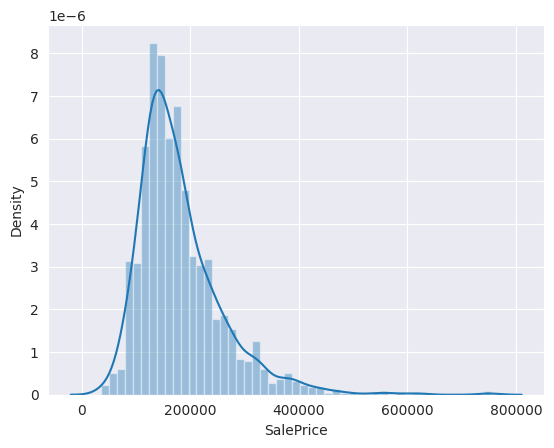

In [31]:
sns.distplot(Y)

The target varaiable is distributed normally but skewed. Taking log of the varaible removes the skewness in the distribution

<Axes: xlabel='SalePrice', ylabel='Density'>

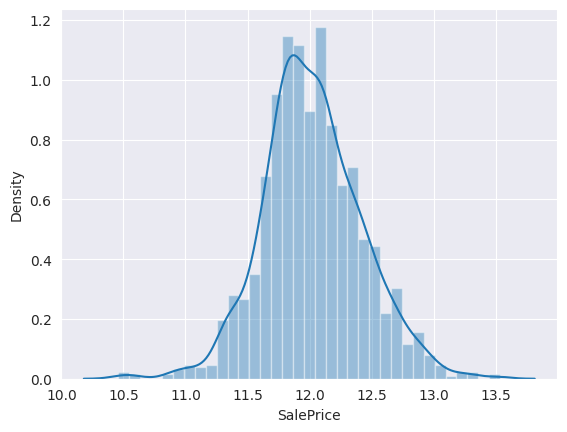

In [32]:
sns.distplot(np.log(Y))

## Exploratory Data Analysis
Defining target variable

In [33]:
Y_log = np.log(Y)

### Correlation with numerical variables

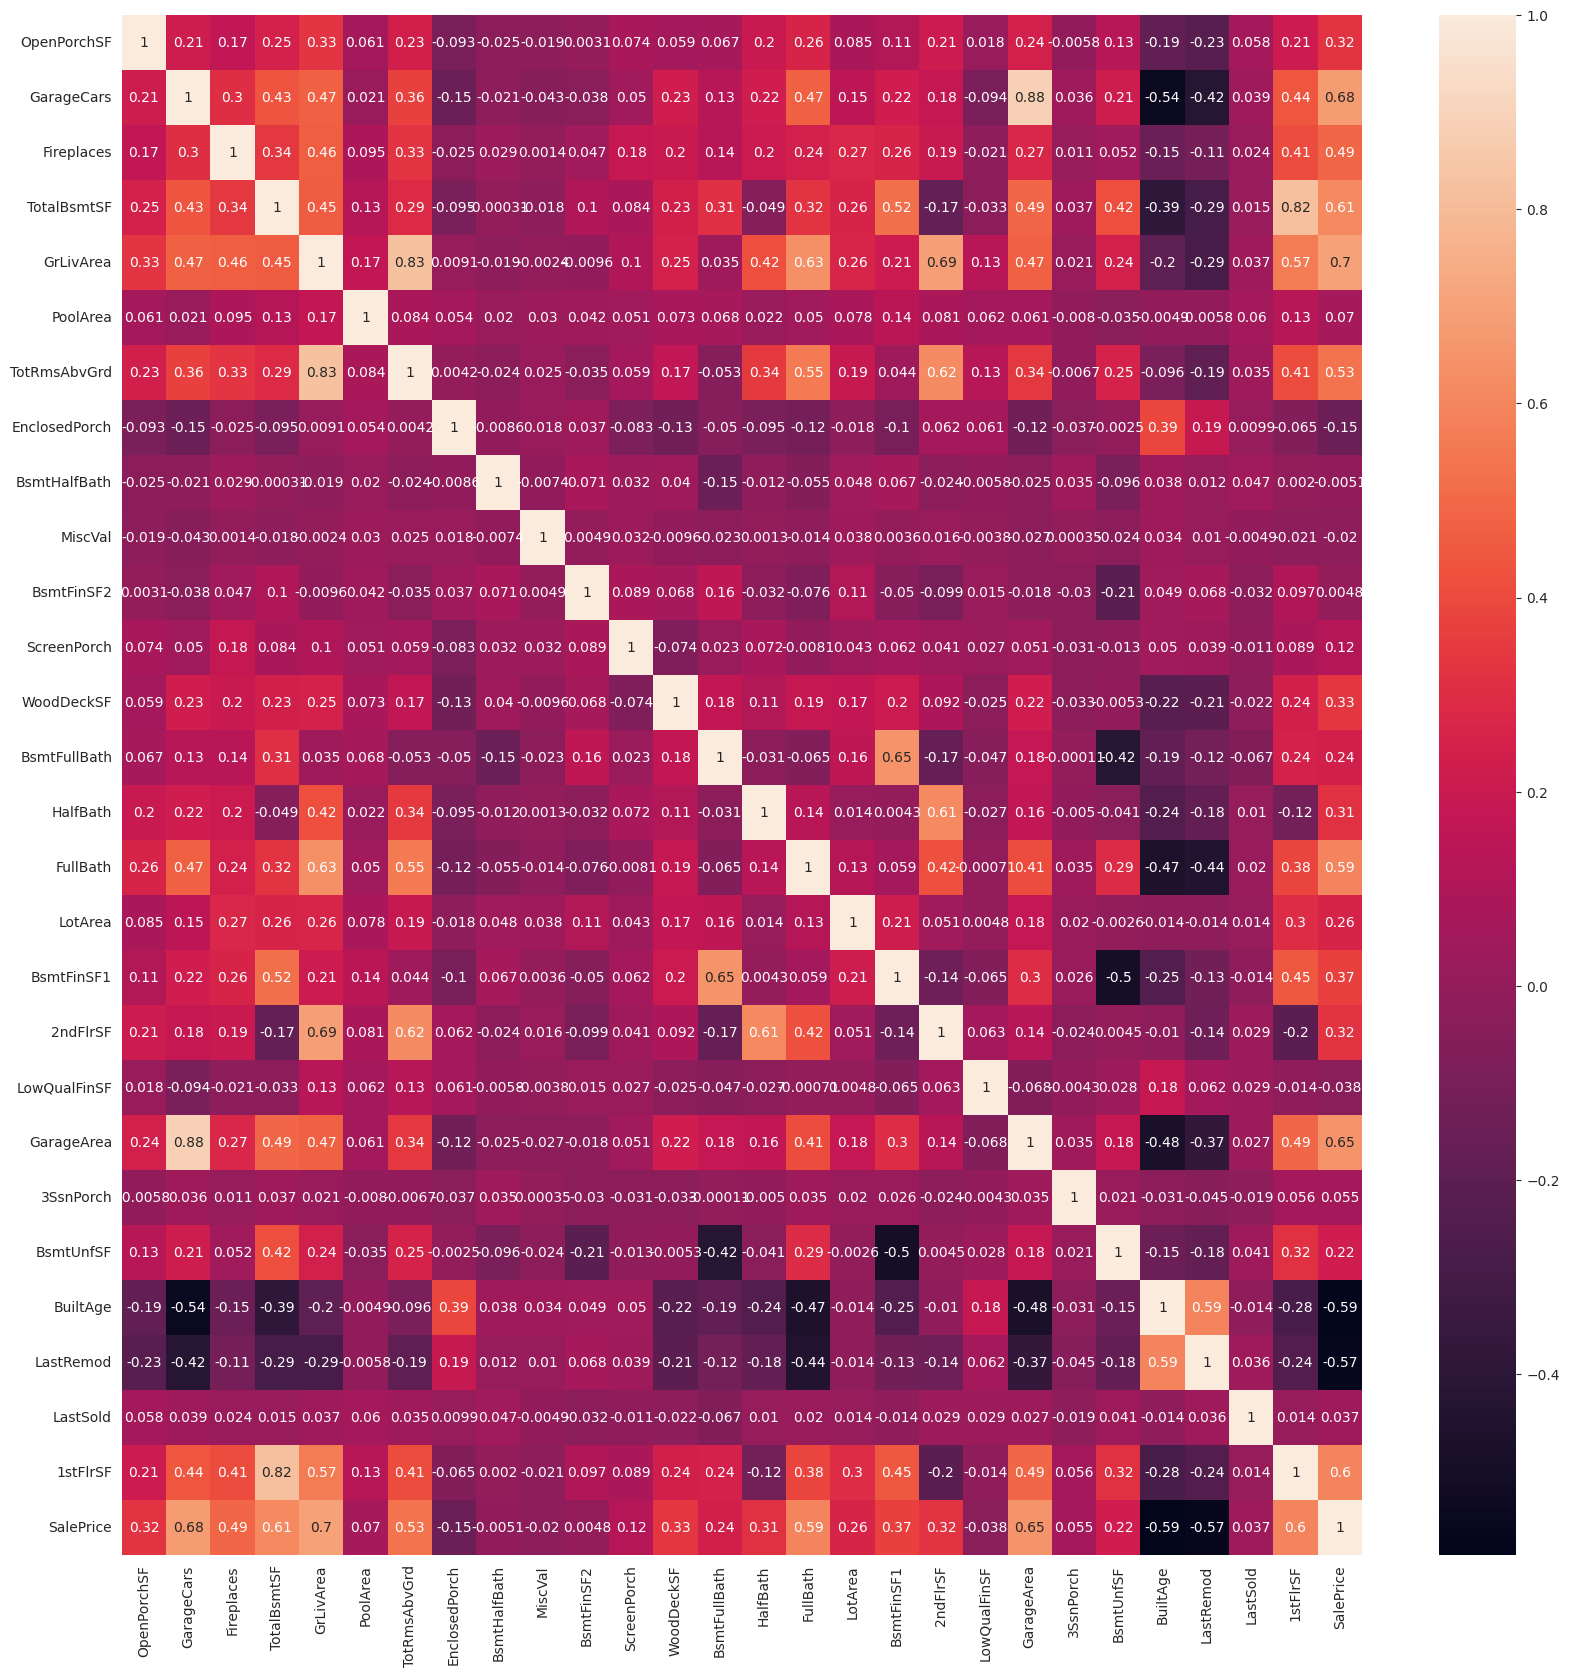

In [34]:
plt.figure(figsize=(20,20))
a = pd.concat((X[numerical_columns], Y_log), axis=1)
sns.heatmap(a.corr(), annot=True)
del a
plt.show()

Finding the correlation of numerical varibles with target variable

In [35]:
corr_salesprice = X[numerical_columns].corrwith(Y_log).sort_values(ascending=False).reset_index()
corr_salesprice.columns = ['col_name', 'corr_value']
corr_salesprice

,col_name,corr_value
0,GrLivArea,0.700927
1,GarageCars,0.680625
2,GarageArea,0.650888
3,TotalBsmtSF,0.612134
4,1stFlrSF,0.596981
5,FullBath,0.594771
6,TotRmsAbvGrd,0.534422
7,Fireplaces,0.489449
8,BsmtFinSF1,0.372023
9,WoodDeckSF,0.334135


In [36]:
highly_corr_columns = corr_salesprice[(corr_salesprice.corr_value >= 0.5) | (corr_salesprice.corr_value <= -0.5)]
highly_corr_columns

,col_name,corr_value
0,GrLivArea,0.700927
1,GarageCars,0.680625
2,GarageArea,0.650888
3,TotalBsmtSF,0.612134
4,1stFlrSF,0.596981
5,FullBath,0.594771
6,TotRmsAbvGrd,0.534422
25,LastRemod,-0.565608
26,BuiltAge,-0.586570


<Figure size 640x480 with 0 Axes>

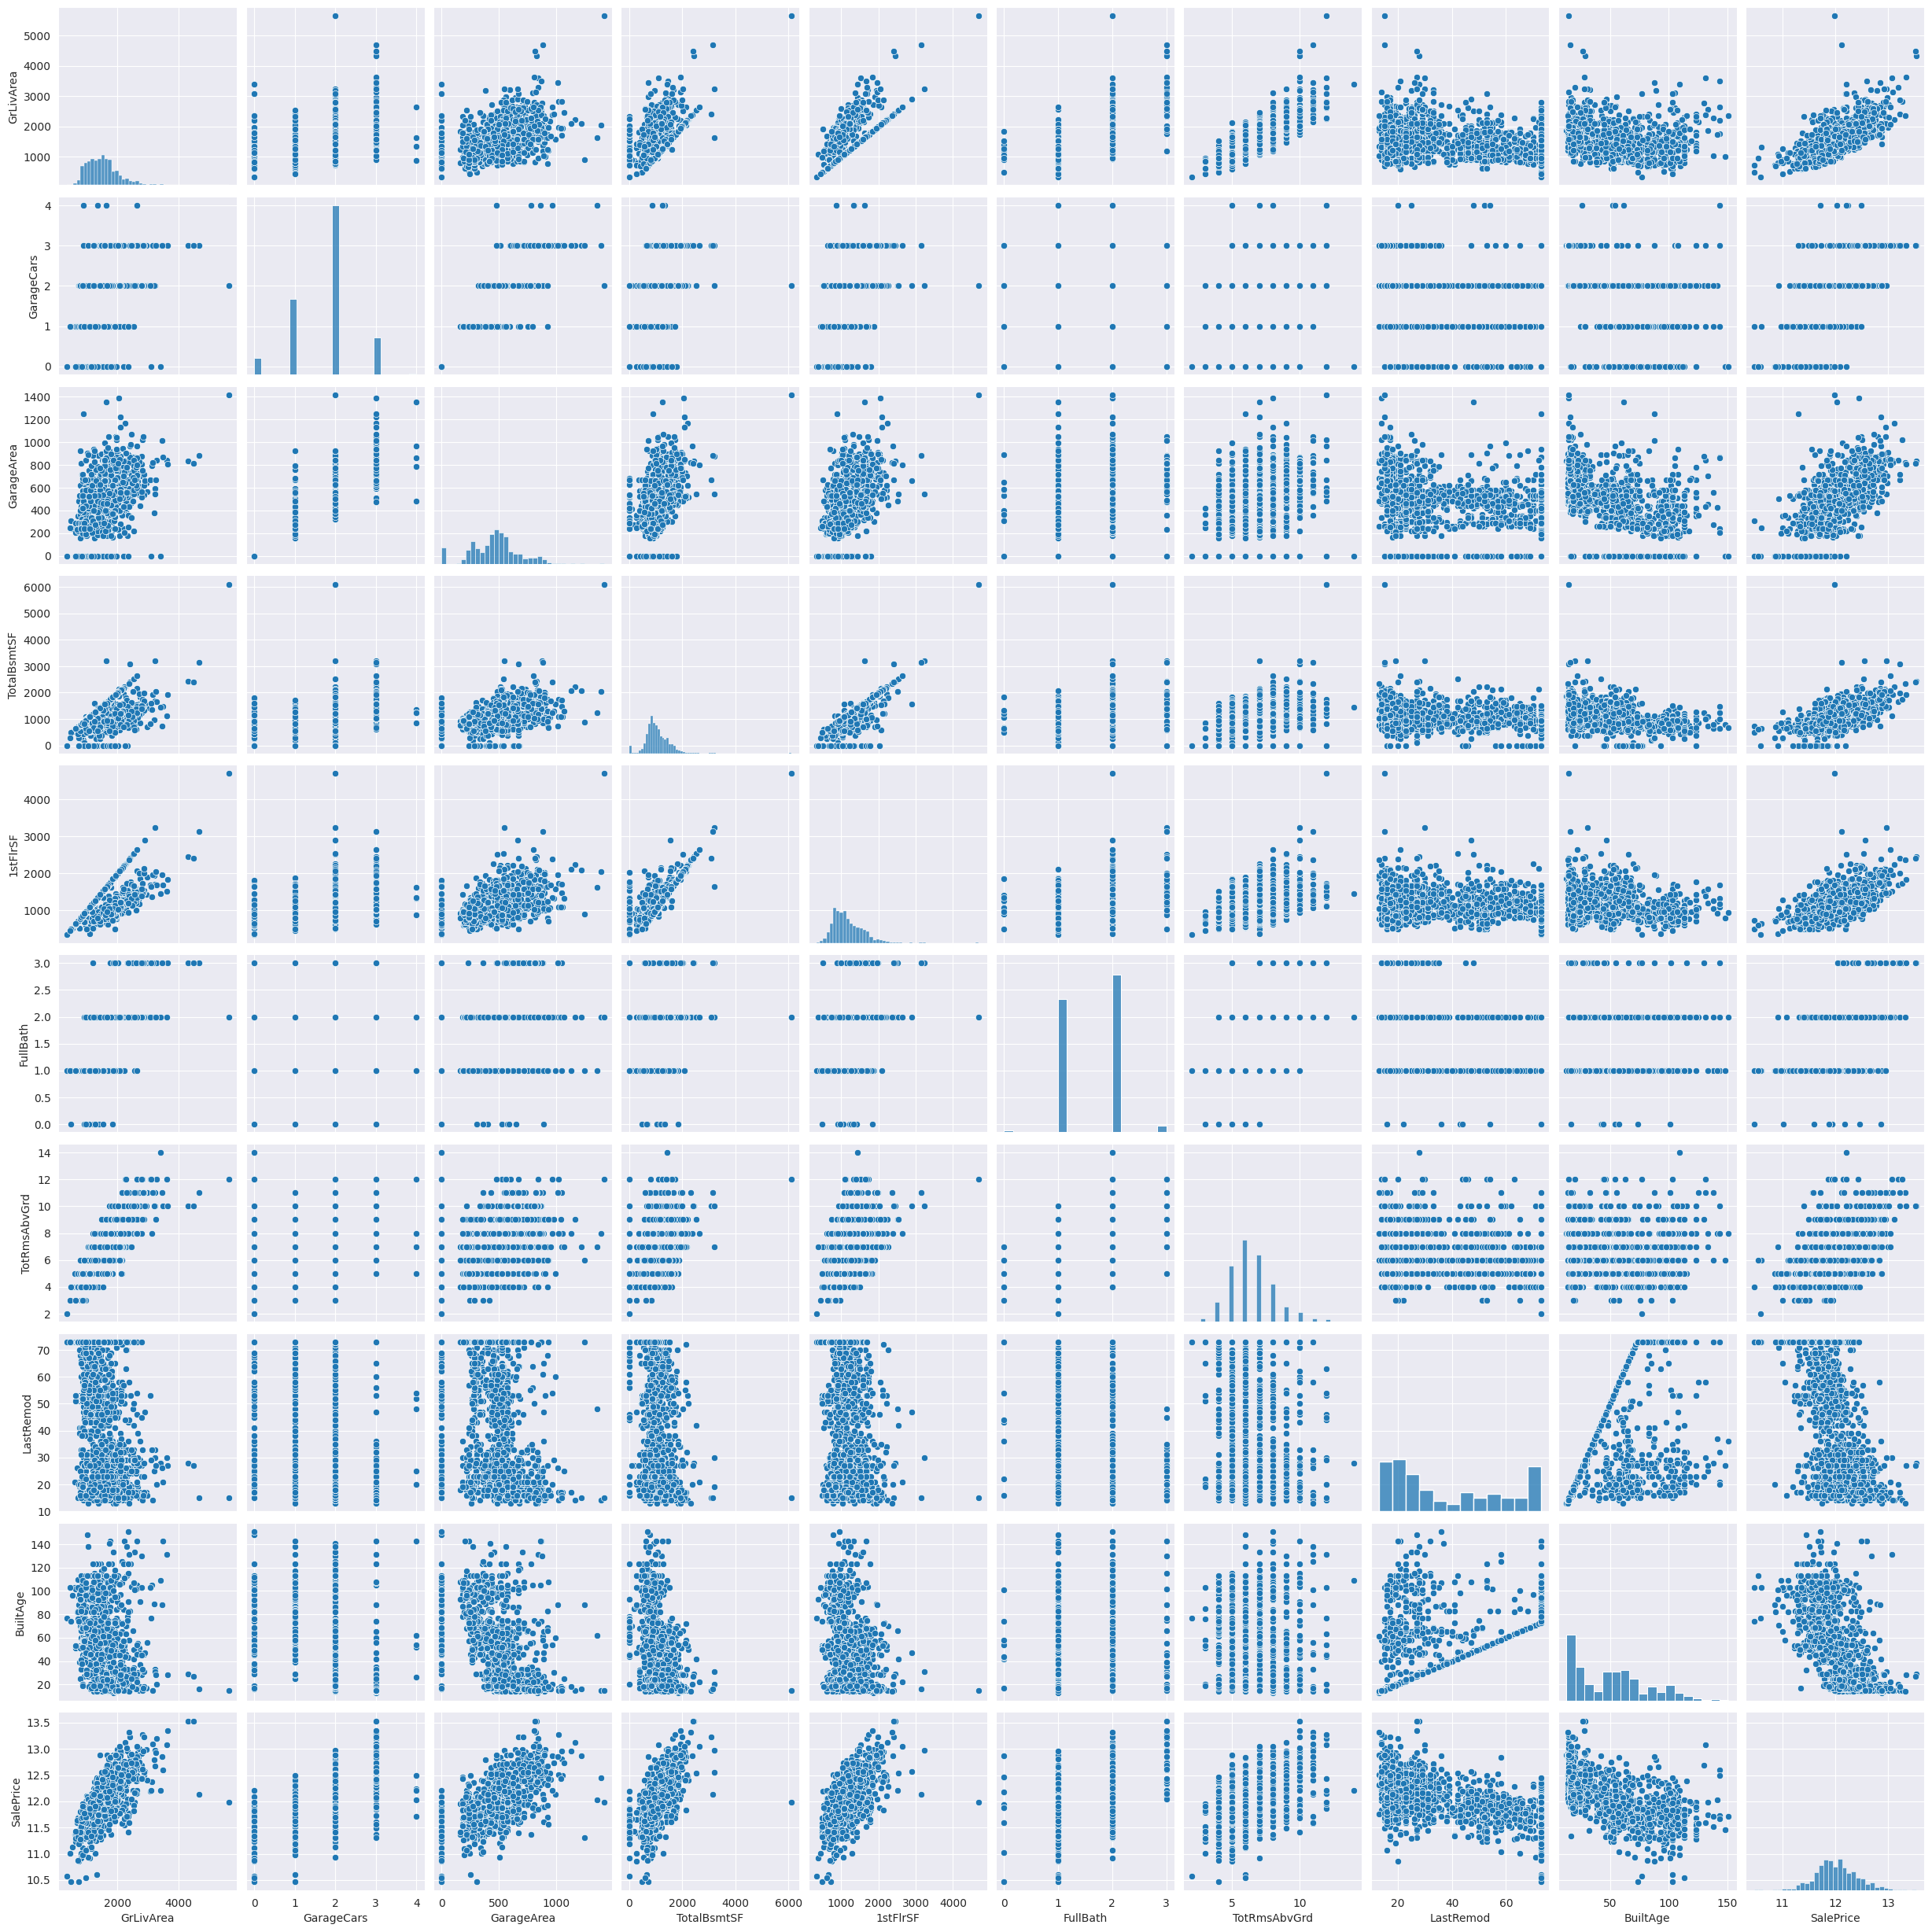

In [37]:
plt.figure()
a = pd.concat((X[highly_corr_columns.col_name], Y_log), axis=1)
sns.pairplot(data=a)
del a
plt.show()

### Bivariate Analysis of categorical variable with target variable

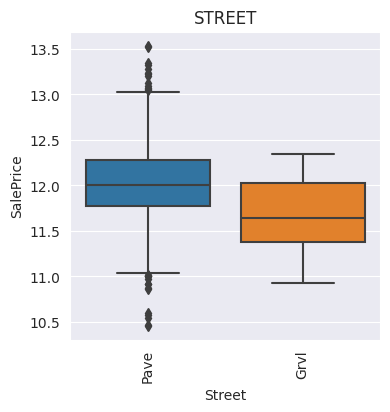

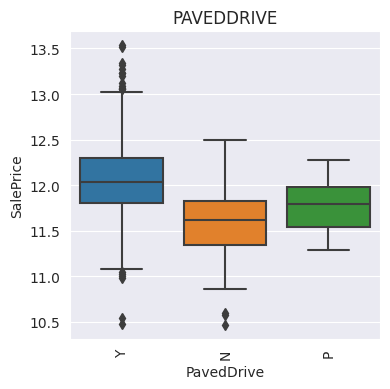

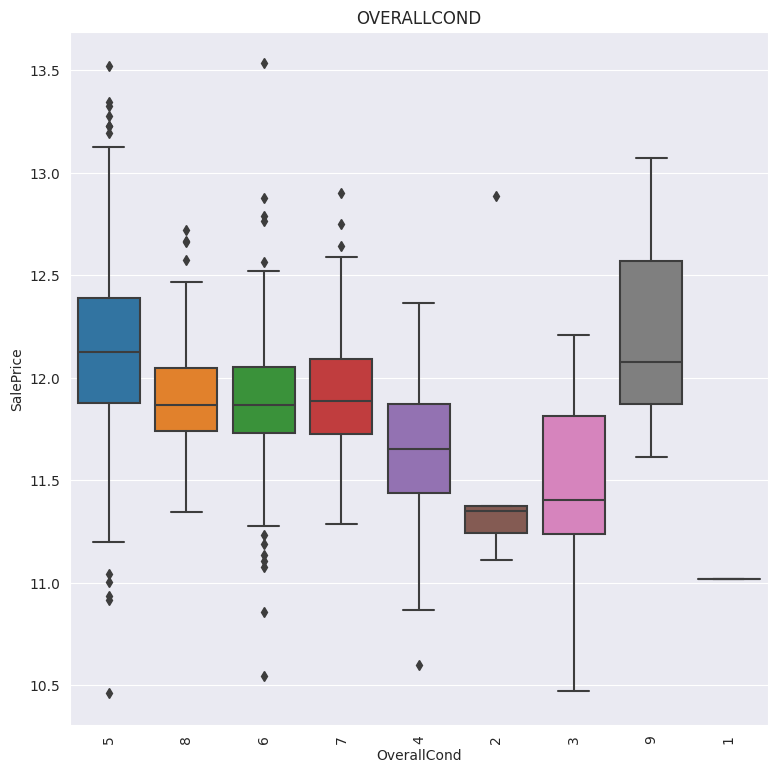

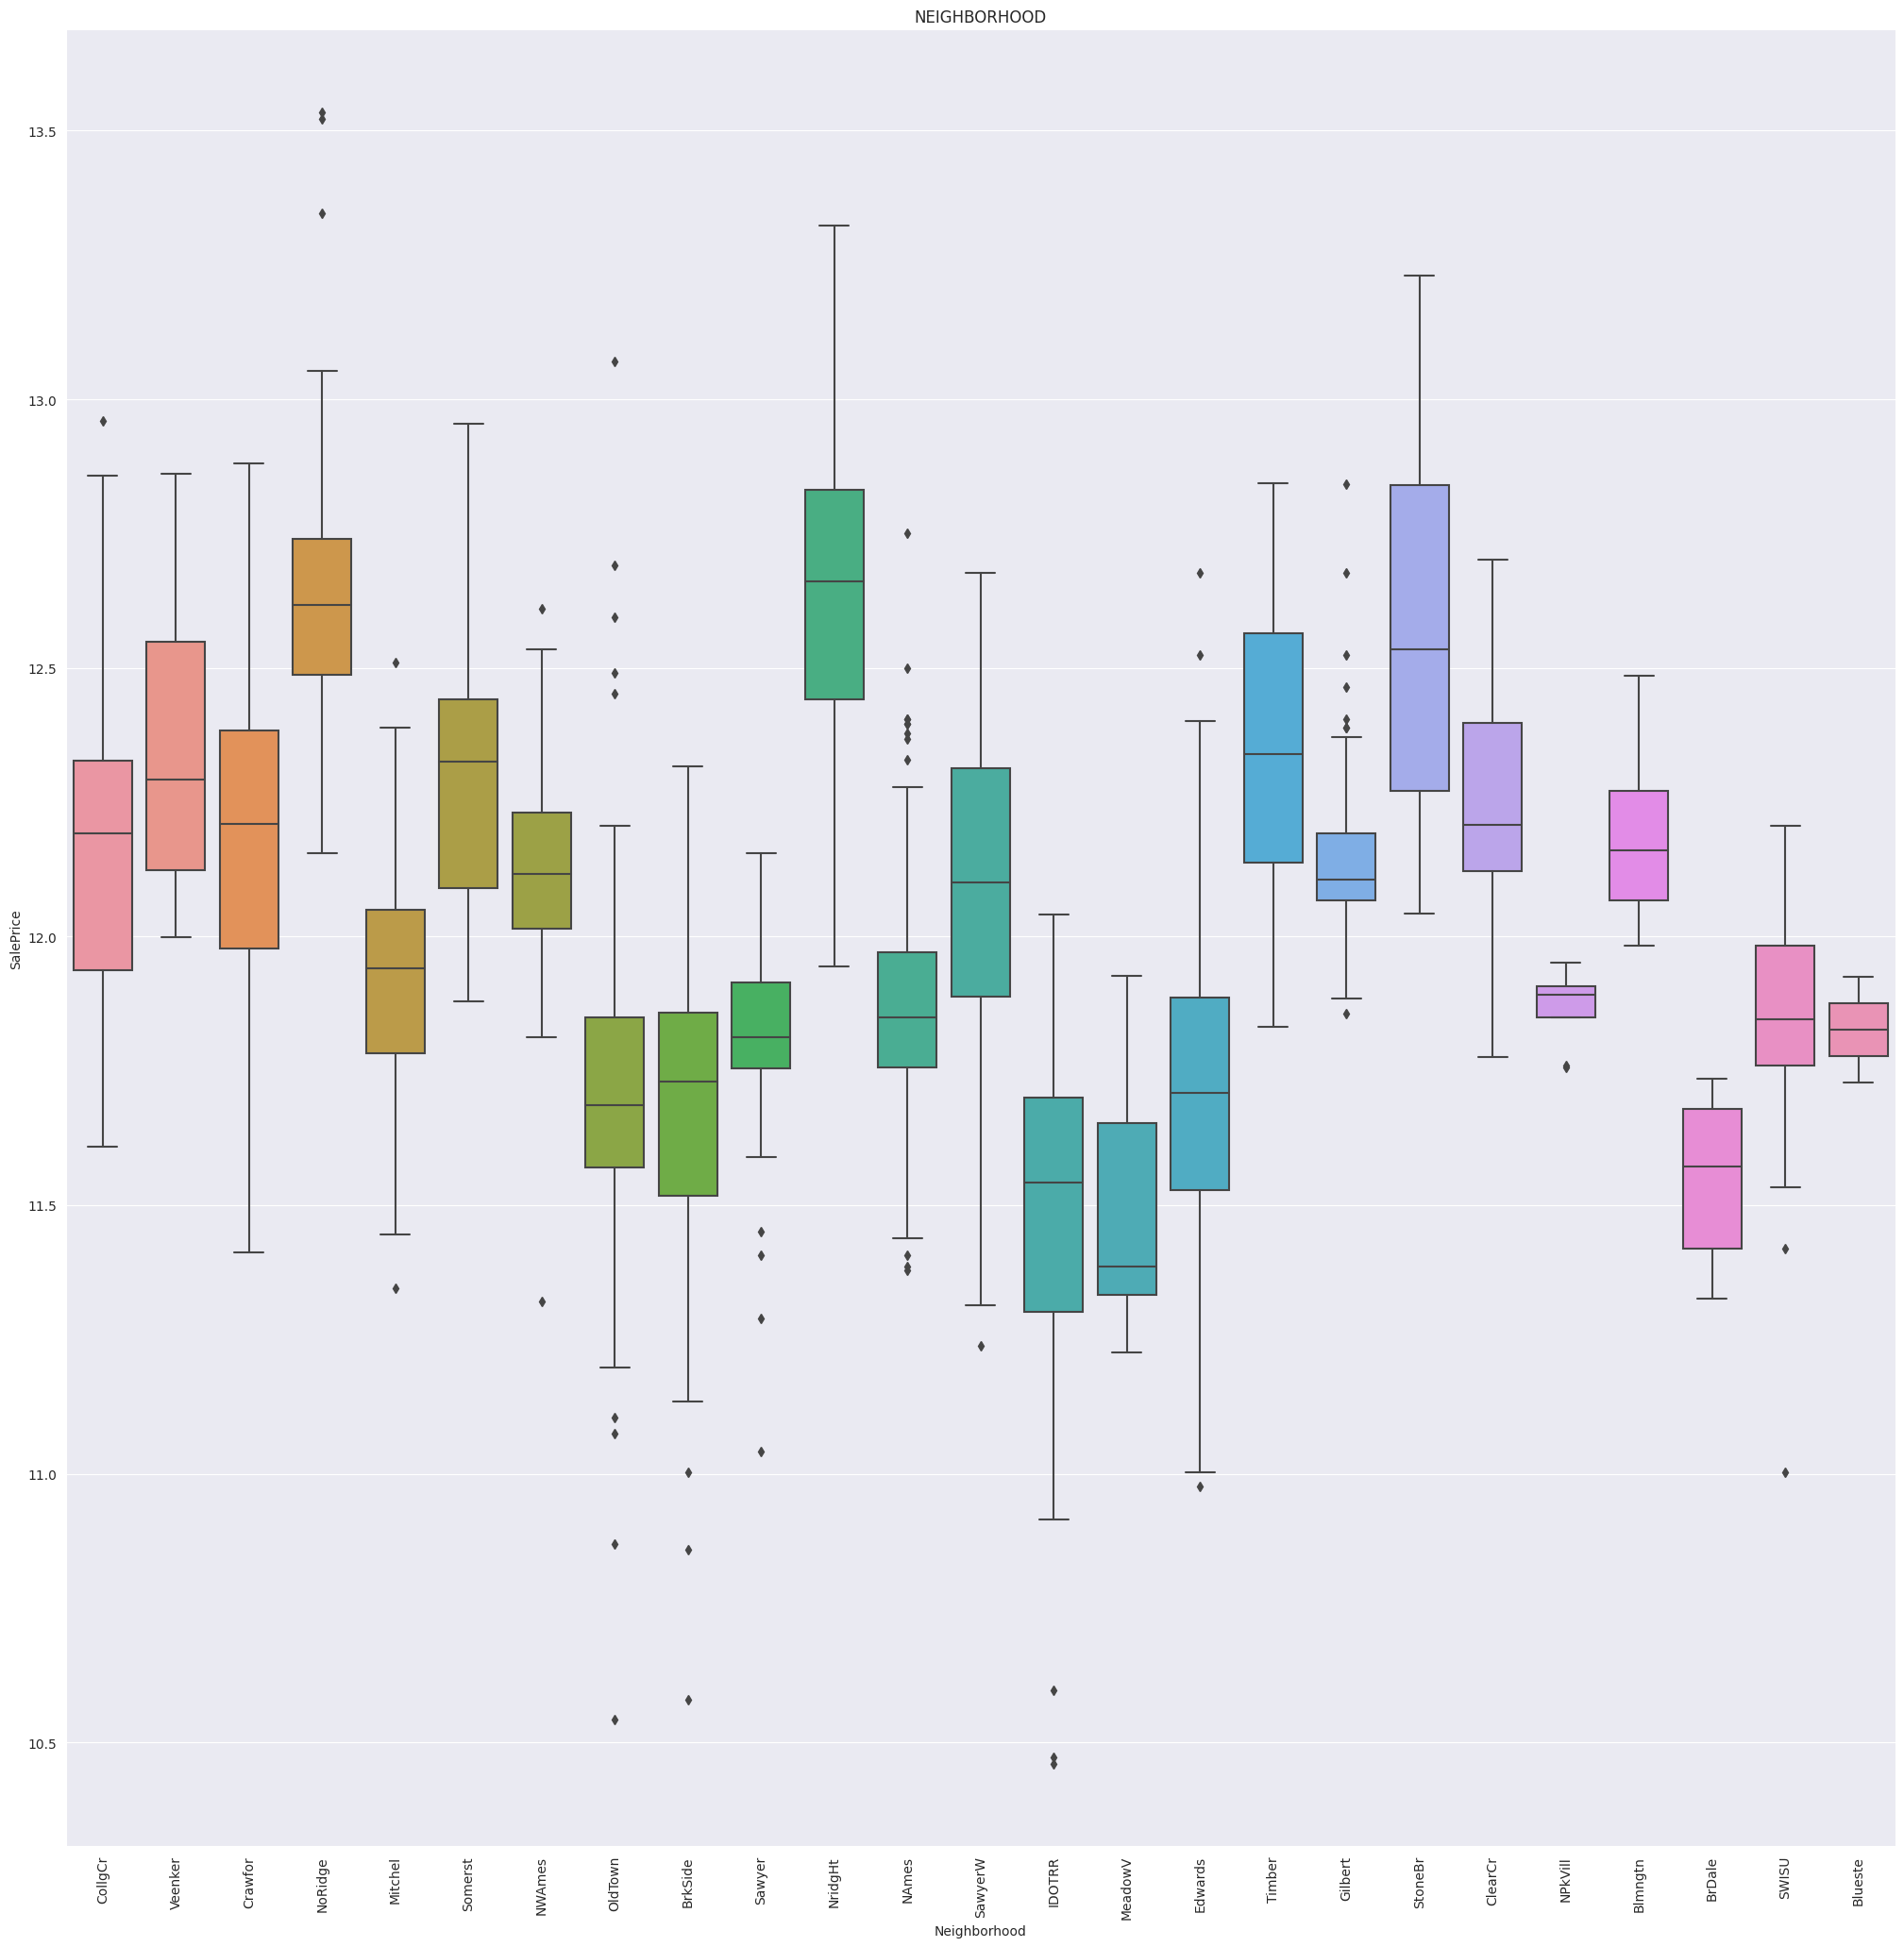

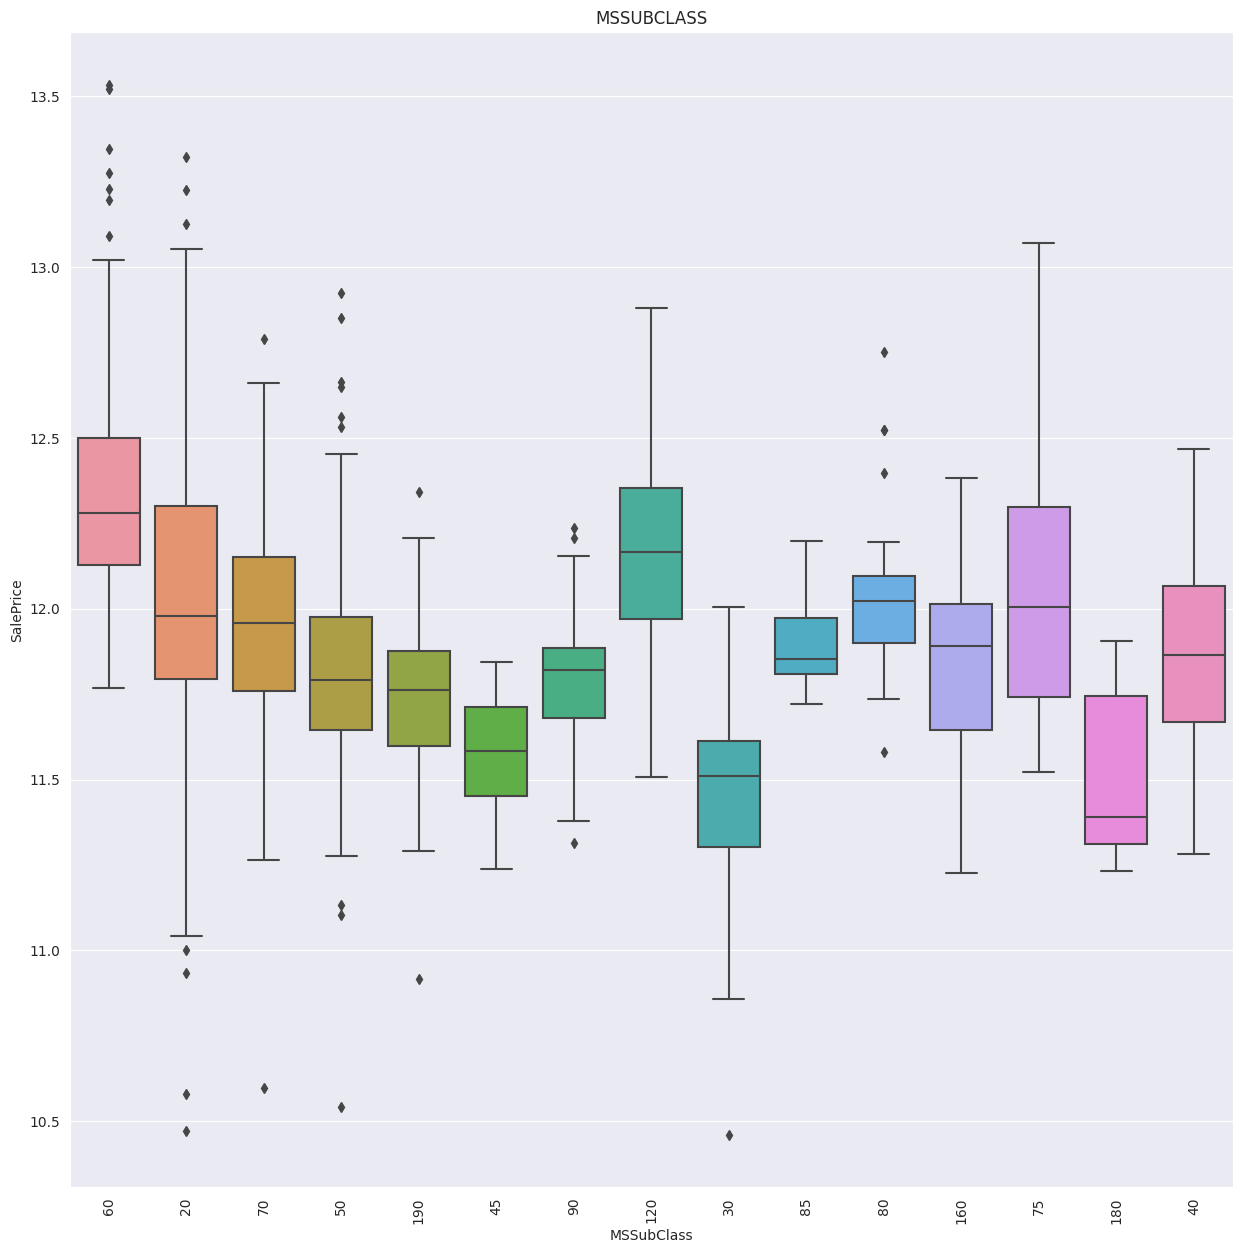

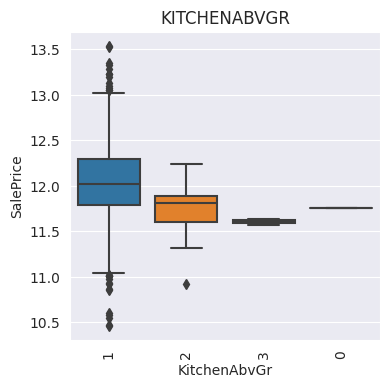

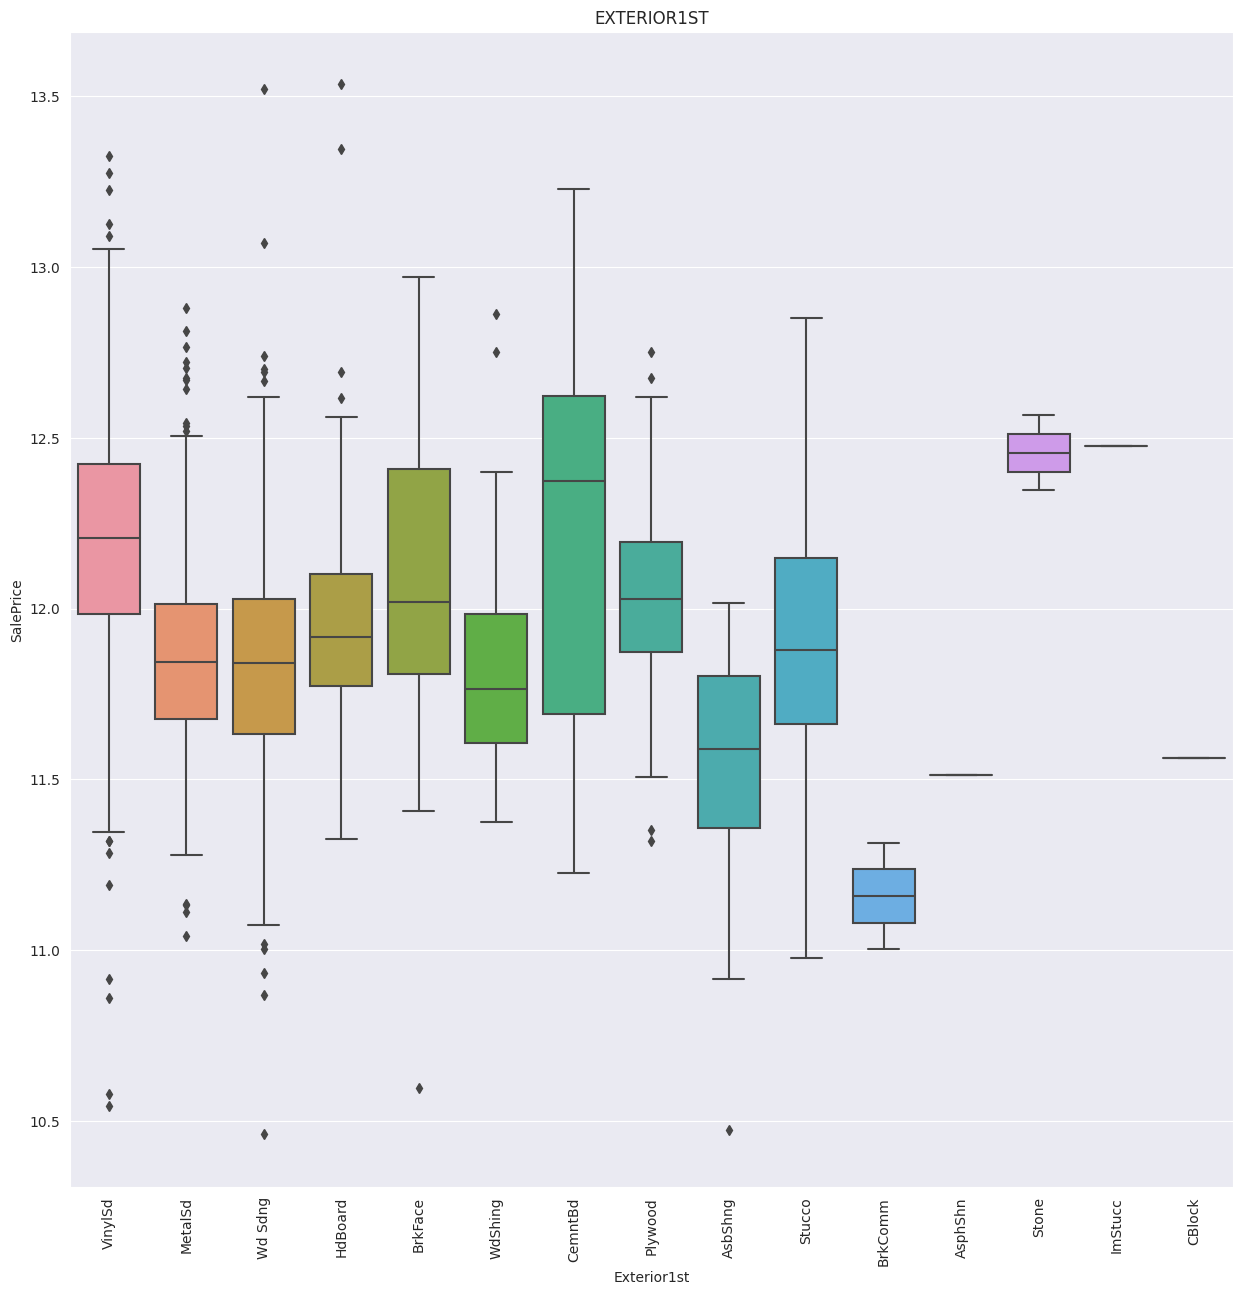

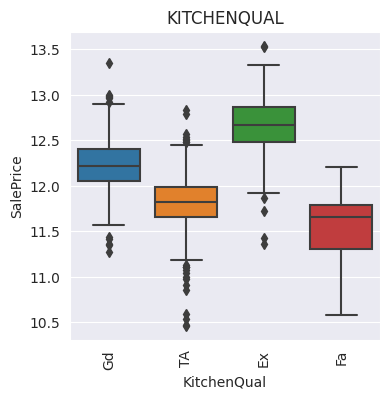

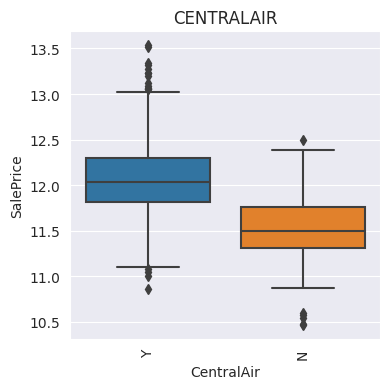

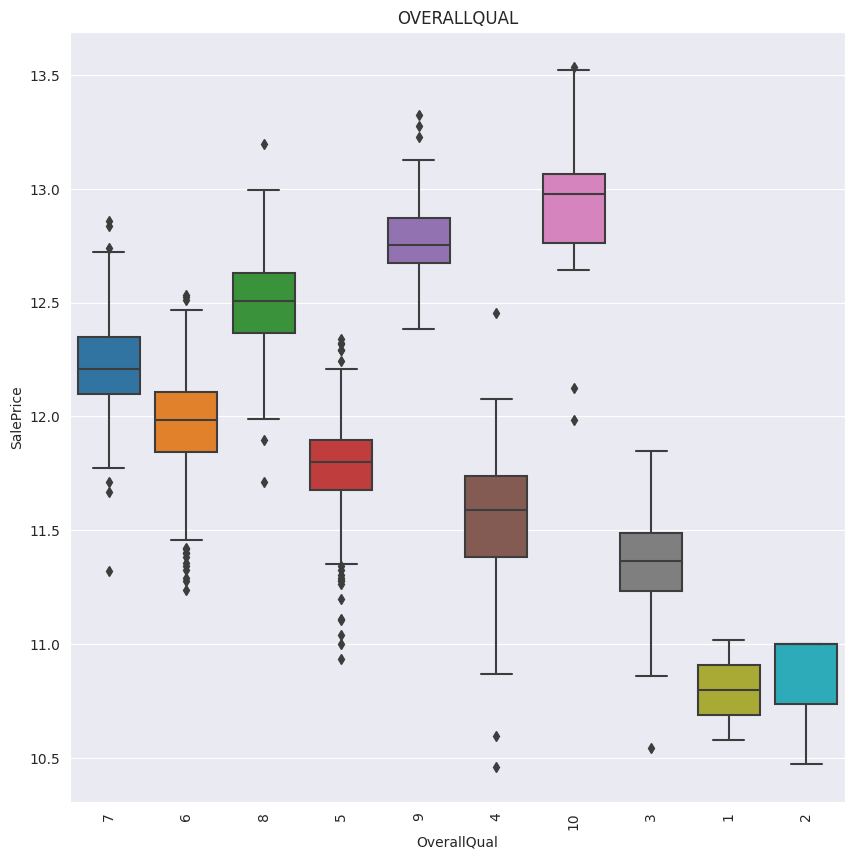

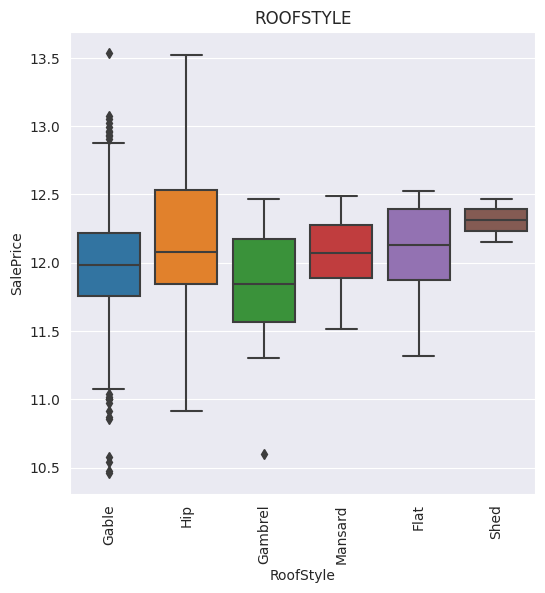

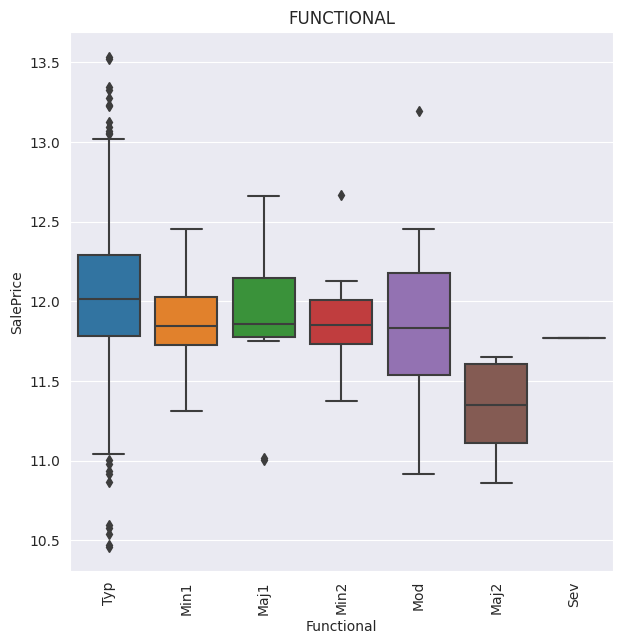

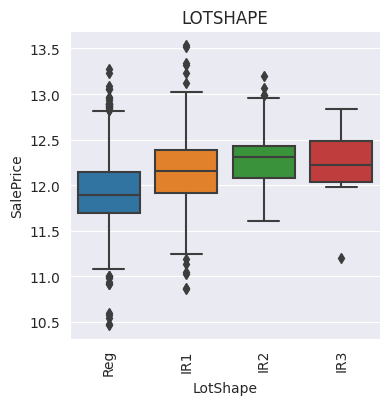

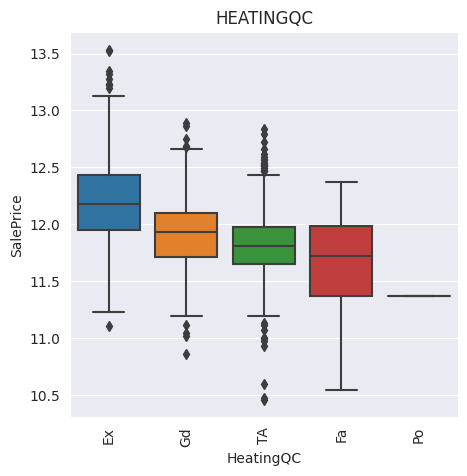

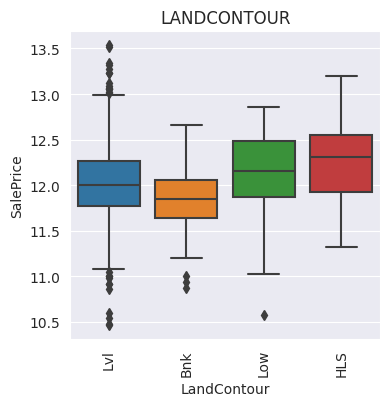

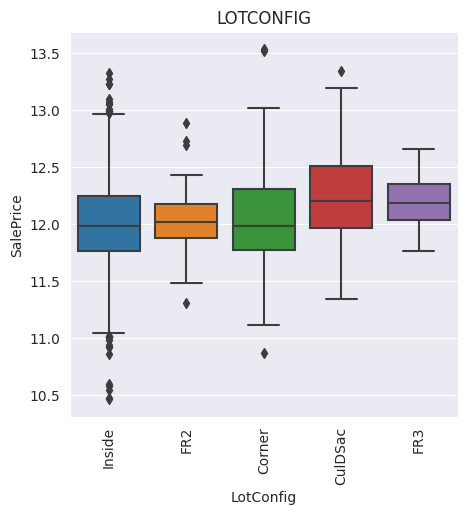

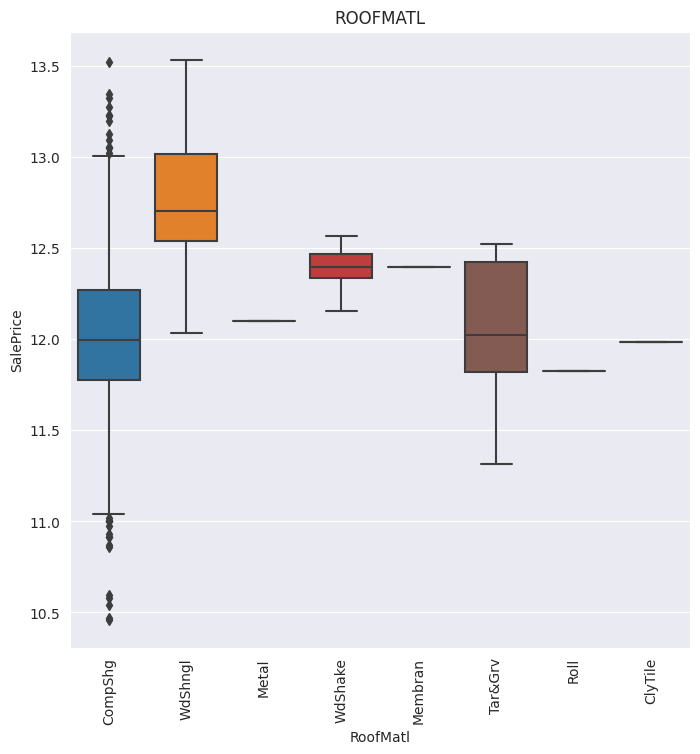

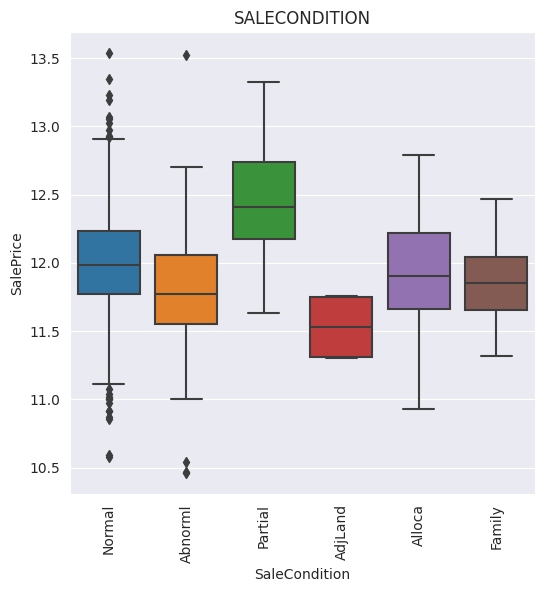

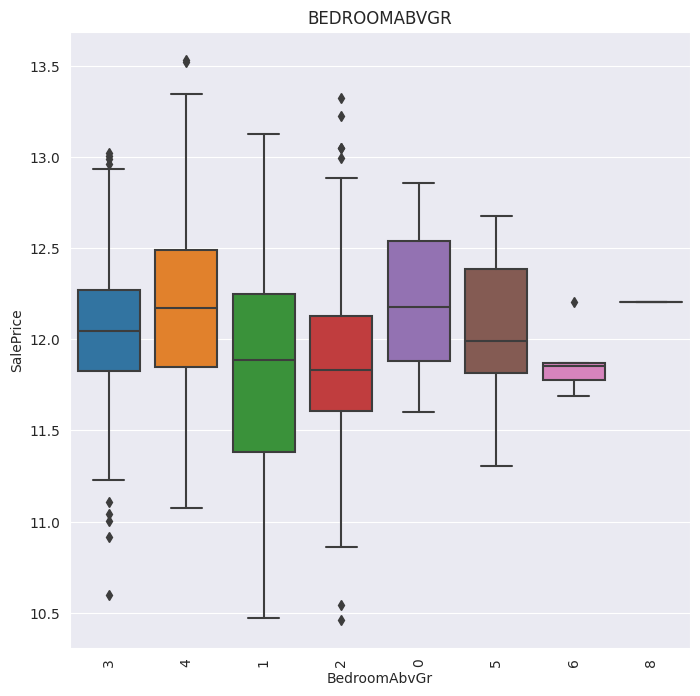

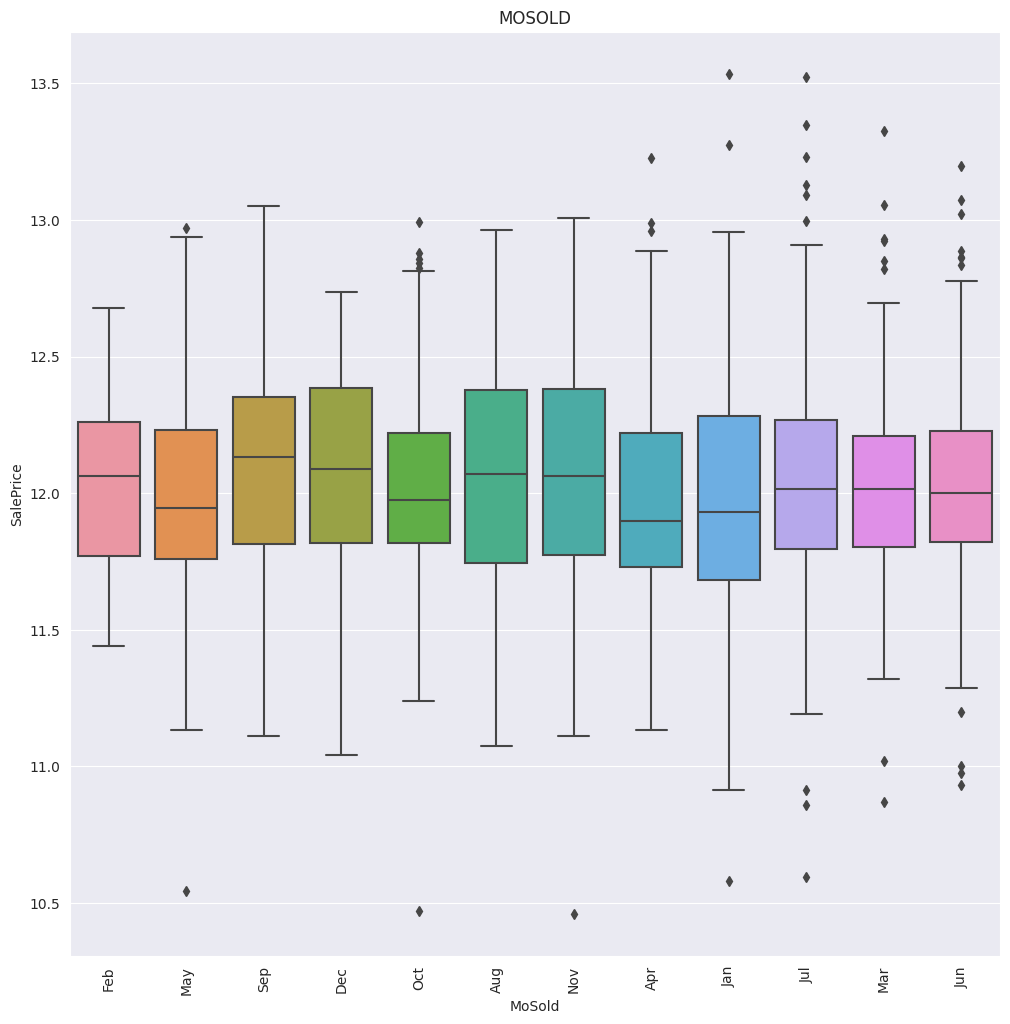

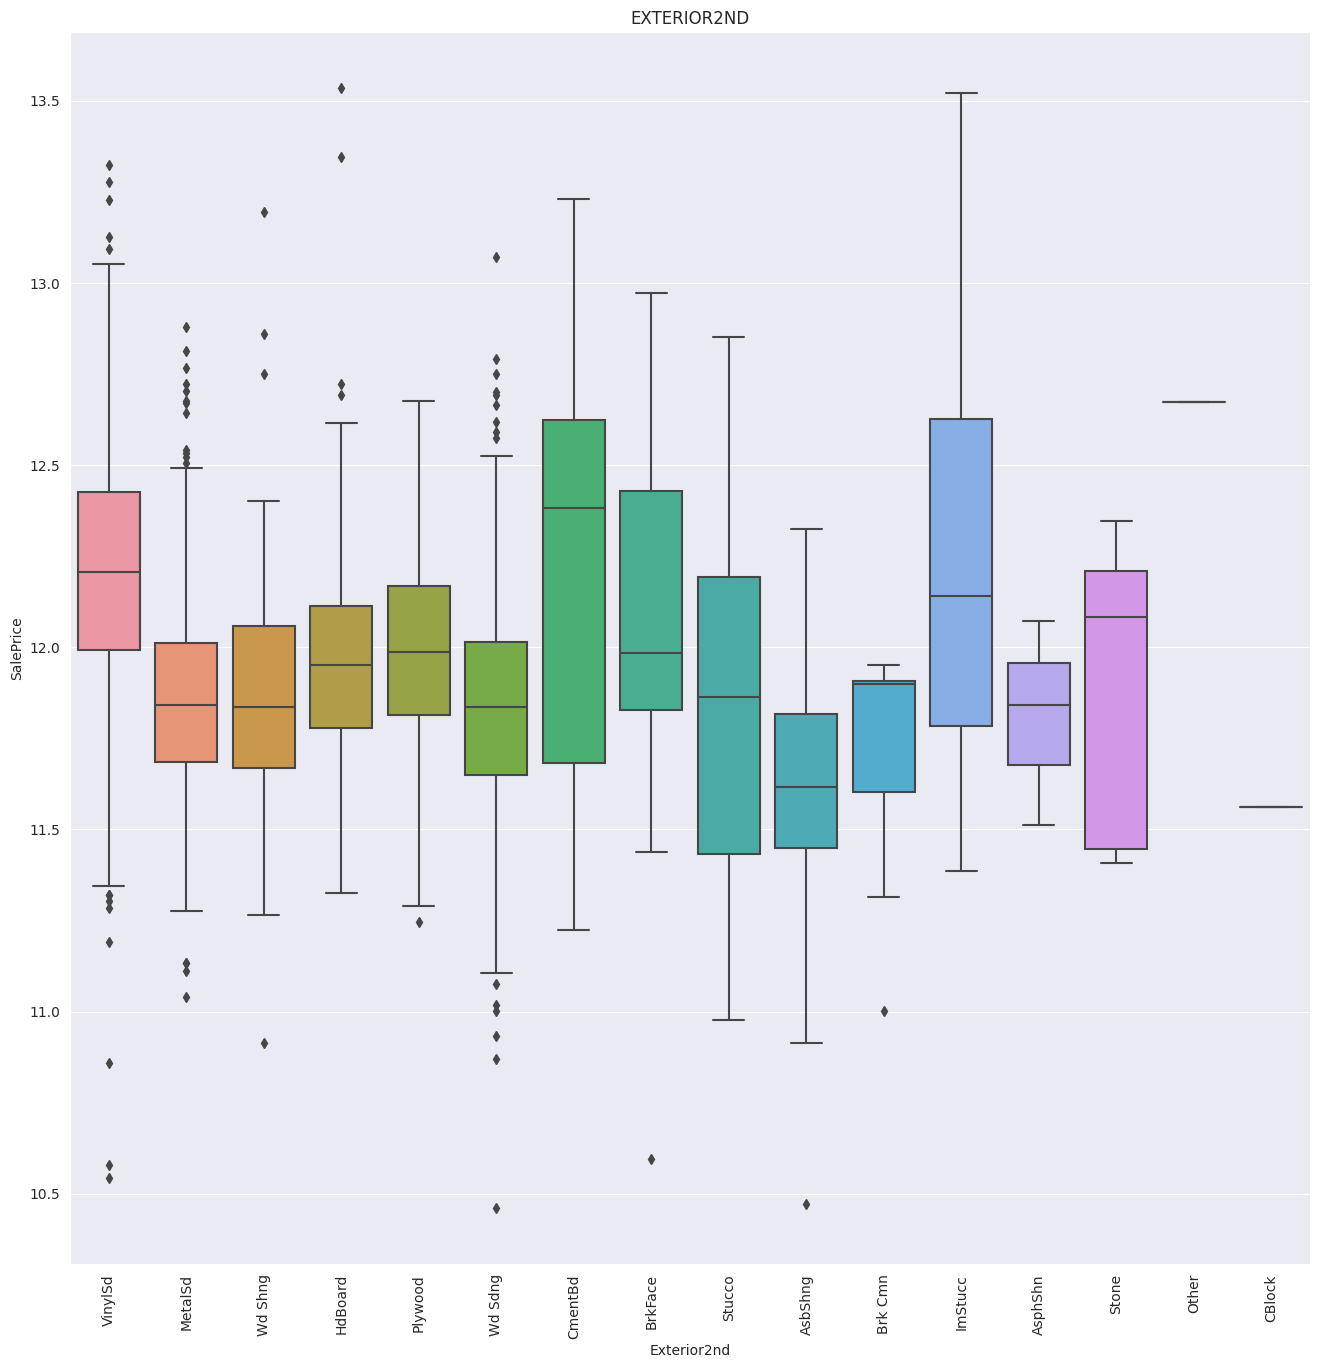

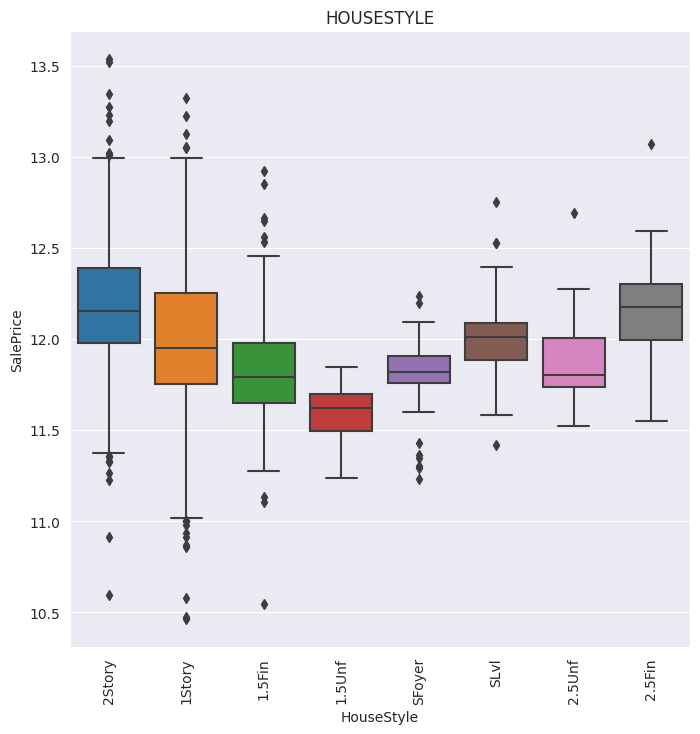

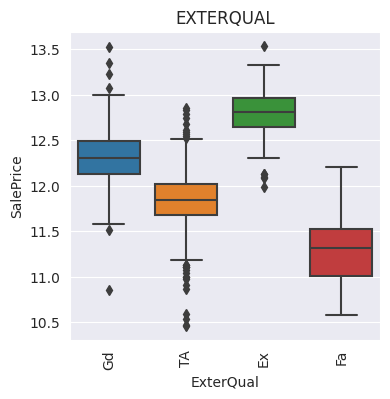

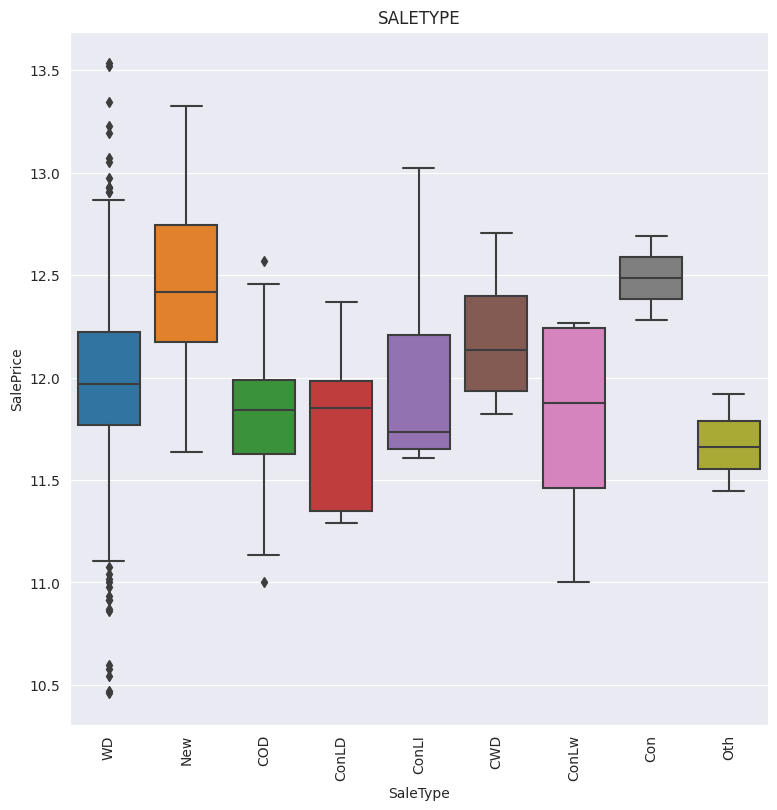

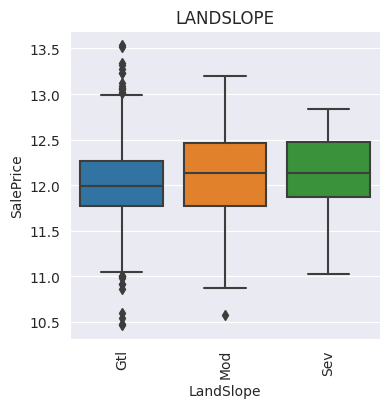

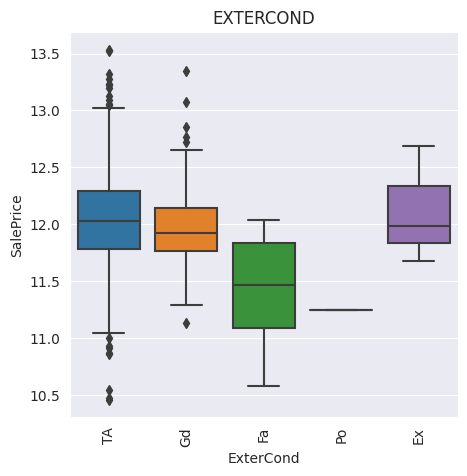

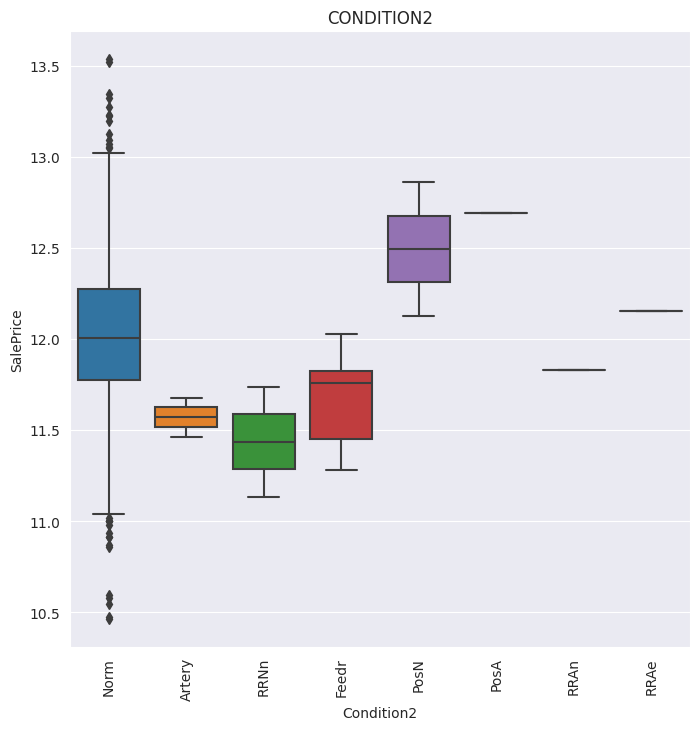

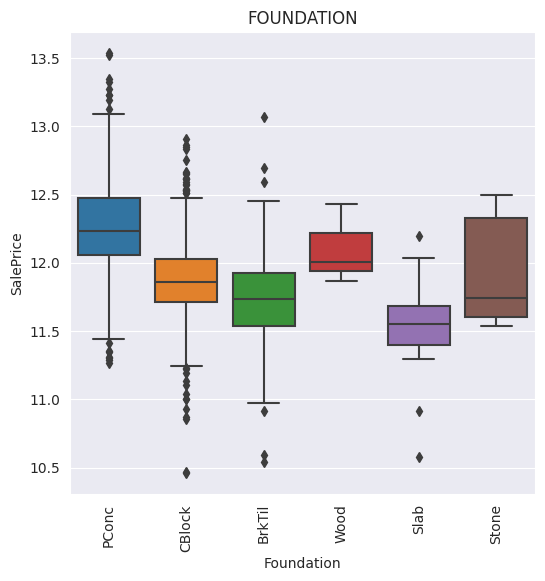

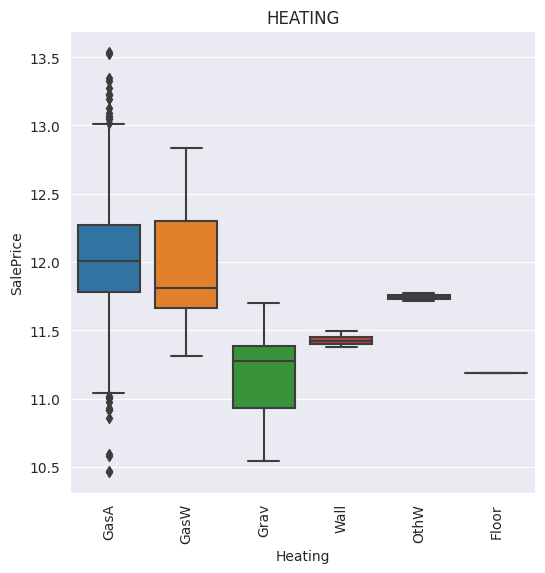

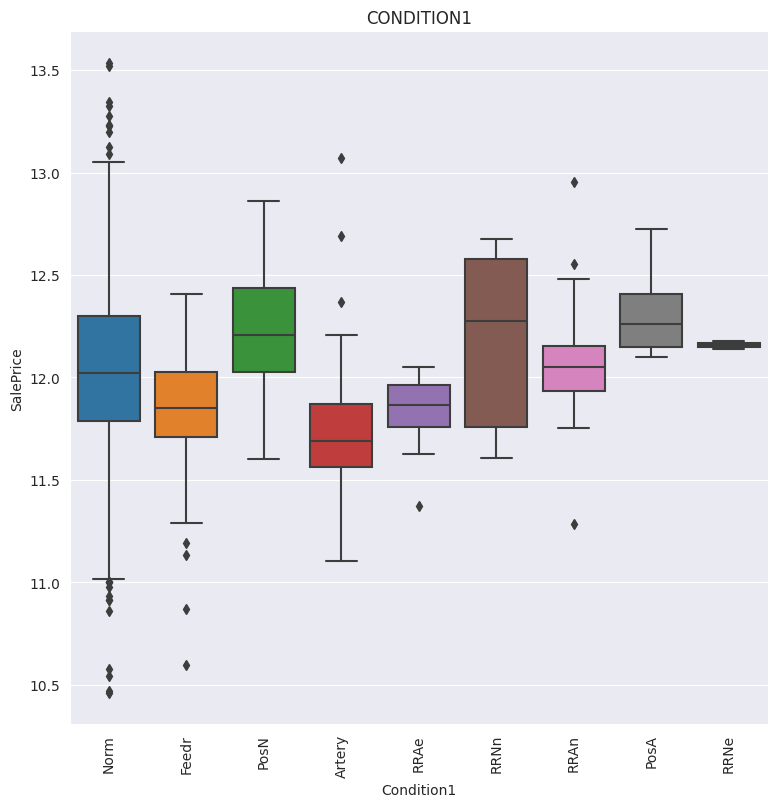

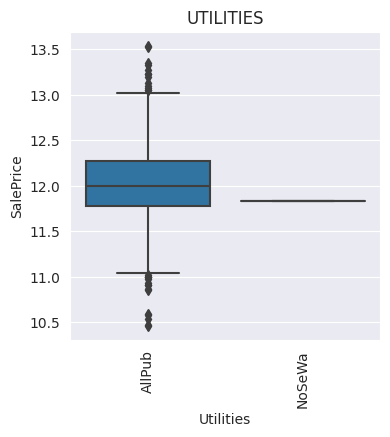

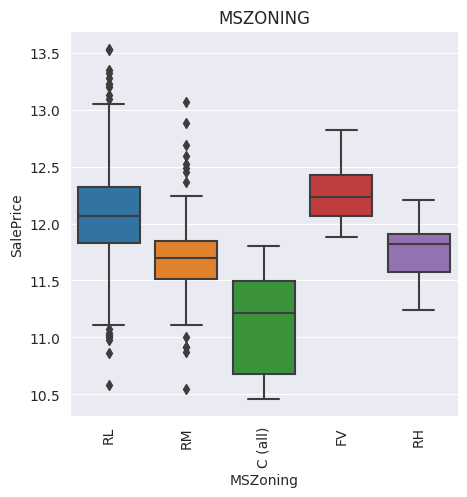

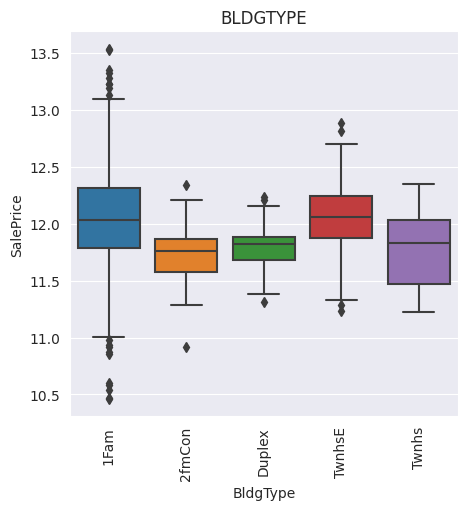

In [38]:
# fig, axs = plt.subplots(36, 1, figsize=(20, 6))
for itr, i in enumerate(categorical_columns):
    a = X[i].nunique()
    if a < 4:
        a = 4
    plt.figure(figsize=(a, a))
    sns.boxplot(x=X[i], y=Y_log)
    plt.title(f"{str(i).upper()}")
    plt.xticks(rotation=90)
    plt.show()

### Data Preparation

In [39]:
X_cat = pd.get_dummies(X[categorical_columns], drop_first=True, prefix=[f"{i}_" for i in categorical_columns]).astype(int)
X_num = X[numerical_columns]
X_final = pd.concat((X_cat, X_num), axis=1)
del X_cat, X_num
X_final.head()

,Street__Pave,PavedDrive__P,PavedDrive__Y,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSSubClass__20,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,KitchenAbvGr__1,KitchenAbvGr__2,KitchenAbvGr__3,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,CentralAir__Y,OverallQual__10,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,LotShape__IR2,LotShape__IR3,LotShape__Reg,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,BedroomAbvGr__1,BedroomAbvGr__2,BedroomAbvGr__3,BedroomAbvGr__4,BedroomAbvGr__5,BedroomAbvGr__6,BedroomAbvGr__8,MoSold__Aug,MoSold__Dec,MoSold__Feb,MoSold__Jan,MoSold__Jul,MoSold__Jun,MoSold__Mar,MoSold__May,MoSold__Nov,MoSold__Oct,MoSold__Sep,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,LandSlope__Mod,LandSlope__Sev,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,ExterCond__TA,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Utilities__NoSeWa,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,OpenPorchSF,GarageCars,Fireplaces,TotalBsmtSF,GrLivArea,PoolArea,TotRmsAbvGrd,EnclosedPorch,BsmtHalfBath,MiscVal,BsmtFinSF2,ScreenPorch,WoodDeckSF,BsmtFullBath,HalfBath,FullBath,LotArea,BsmtFinSF1,2ndFlrSF,LowQualFinSF,GarageArea,3SsnPorch,BsmtUnfSF,BuiltAge,LastRemod,LastSold,1stFlrSF
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0

Final shape of the training data

In [40]:
X_final.shape 

(1460, 234)

In [41]:
final_columns = X_final.columns.to_list()

In [42]:
Y_final = Y_log.copy()
del Y_log
Y_final.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## Data Preparation for model training

### Train-Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, train_size=0.7, random_state=42)

### Scaling the data

In [44]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=final_columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=final_columns)

Using standard scaling since it is providing better results

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 234), (439, 234), (1021,), (439,))

<Axes: xlabel='SalePrice', ylabel='Density'>

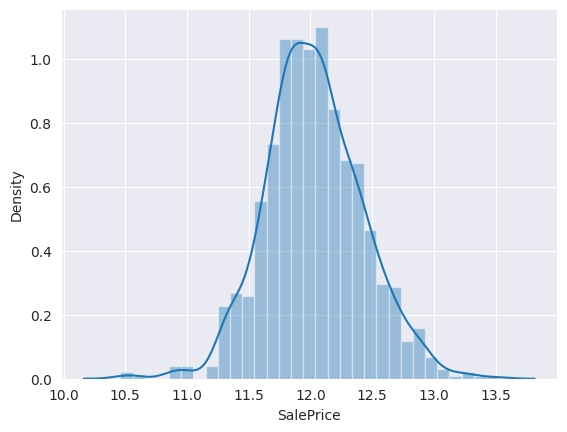

In [46]:
sns.distplot(y_train)

In [47]:
X_train.head()

,Street__Pave,PavedDrive__P,PavedDrive__Y,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSSubClass__20,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,KitchenAbvGr__1,KitchenAbvGr__2,KitchenAbvGr__3,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,CentralAir__Y,OverallQual__10,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,LotShape__IR2,LotShape__IR3,LotShape__Reg,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,BedroomAbvGr__1,BedroomAbvGr__2,BedroomAbvGr__3,BedroomAbvGr__4,BedroomAbvGr__5,BedroomAbvGr__6,BedroomAbvGr__8,MoSold__Aug,MoSold__Dec,MoSold__Feb,MoSold__Jan,MoSold__Jul,MoSold__Jun,MoSold__Mar,MoSold__May,MoSold__Nov,MoSold__Oct,MoSold__Sep,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,LandSlope__Mod,LandSlope__Sev,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,ExterCond__TA,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Utilities__NoSeWa,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,OpenPorchSF,GarageCars,Fireplaces,TotalBsmtSF,GrLivArea,PoolArea,TotRmsAbvGrd,EnclosedPorch,BsmtHalfBath,MiscVal,BsmtFinSF2,ScreenPorch,WoodDeckSF,BsmtFullBath,HalfBath,FullBath,LotArea,BsmtFinSF1,2ndFlrSF,LowQualFinSF,GarageArea,3SsnPorch,BsmtUnfSF,BuiltAge,LastRemod,LastSold,1stFlrSF
0,0.062715,-0.148398,0.30328,-0.062715,-0.133963,-0.193911,0.873719,-0.459511,-0.401929,-0.214724,-0.130124,-0.031311,-0.109055,-0.20454,-0.137703,-0.345713,-0.196614,

## Linear Regression Model Training

In [48]:
slr_estimator = LinearRegression()

In [49]:
rfe_model = RFE(slr_estimator, n_features_to_select=0.5)
rfe_model = rfe_model.fit(X_train, y_train)

In [50]:
rfe_analysis = pd.DataFrame(list(zip(final_columns, rfe_model.support_, rfe_model.ranking_)), columns=['ColumnName', 'Support', 'Rank'])
rfe_analysis.sort_values(by='Rank')

,ColumnName,Support,Rank
116,BedroomAbvGr__1,True,1
110,RoofMatl__WdShngl,True,1
112,SaleCondition__Alloca,True,1
114,SaleCondition__Normal,True,1
137,Exterior2nd__CBlock,True,1
...,...,...,...
162,SaleType__ConLI,False,114
125,MoSold__Feb,False,115
23,Neighborhood__NPkVill,False,116
182,Foundation__Slab,False,117


In [51]:
selected_colums = rfe_analysis[rfe_analysis.Support]['ColumnName']
selected_colums

3             OverallCond__2
4             OverallCond__3
5             OverallCond__4
6             OverallCond__5
7             OverallCond__6
8             OverallCond__7
9             OverallCond__8
10            OverallCond__9
13     Neighborhood__BrkSide
16     Neighborhood__Crawfor
17     Neighborhood__Edwards
20     Neighborhood__MeadowV
26     Neighborhood__NridgHt
32     Neighborhood__StoneBr
35           MSSubClass__160
37           MSSubClass__190
38            MSSubClass__20
39            MSSubClass__30
40            MSSubClass__40
41            MSSubClass__45
42            MSSubClass__50
43            MSSubClass__60
44            MSSubClass__70
45            MSSubClass__75
46            MSSubClass__80
47            MSSubClass__85
48            MSSubClass__90
49           KitchenAbvGr__1
51           KitchenAbvGr__3
53      Exterior1st__BrkComm
54      Exterior1st__BrkFace
55       Exterior1st__CBlock
56      Exterior1st__CemntBd
58      Exterior1st__ImStucc
59      Exteri

In [52]:
X_train[selected_colums].head()

,OverallCond__2,OverallCond__3,OverallCond__4,OverallCond__5,OverallCond__6,OverallCond__7,OverallCond__8,OverallCond__9,Neighborhood__BrkSide,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__MeadowV,Neighborhood__NridgHt,Neighborhood__StoneBr,MSSubClass__160,MSSubClass__190,MSSubClass__20,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,KitchenAbvGr__1,KitchenAbvGr__3,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__ImStucc,Exterior1st__MetalSd,KitchenQual__Gd,KitchenQual__TA,CentralAir__Y,OverallQual__10,OverallQual__2,OverallQual__3,OverallQual__4,OverallQual__5,OverallQual__6,OverallQual__7,OverallQual__8,OverallQual__9,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,Functional__Maj2,Functional__Sev,Functional__Typ,HeatingQC__Gd,HeatingQC__TA,LotConfig__CulDSac,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,SaleCondition__Alloca,SaleCondition__Normal,BedroomAbvGr__1,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__MetalSd,HouseStyle__1.5Unf,HouseStyle__2Story,ExterQual__Gd,ExterQual__TA,SaleType__New,SaleType__Oth,LandSlope__Sev,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRNn,Foundation__PConc,Heating__GasA,Heating__GasW,Heating__Grav,Heating__Wall,Condition1__Norm,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,GarageCars,Fireplaces,TotalBsmtSF,GrLivArea,EnclosedPorch,MiscVal,BsmtFinSF2,ScreenPorch,WoodDeckSF,BsmtFullBath,HalfBath,FullBath,LotArea,BsmtFinSF1,2ndFlrSF,LowQualFinSF,GarageArea,BsmtUnfSF,BuiltAge,LastRemod,1stFlrSF
0,-0.062715,-0.133963,-0.193911,0.873719,-0.459511,-0.401929,-0.214724,-0.130124,-0.20454,-0.196614,3.453122,-0.099454,-0.226921,-0.141351,-0.214724,-0.151809,-0.765117,-0.217208,-0.044302,-0.094304,-0.324004,-0.504281,-0.224525,-0.113564,-0.201928,-0.113564,-0.191176,0.222108,0.0,-0.044302,-0.188406,-0.031311,-0.199286,0.0,-0.413366,-0.827538,0.999021,0.281569,-0.10436,-0.031311,-0.11791,-0.291575,1.706422,-0.601110,-0.537719,-0.368383,-0.173990,0.543770,-0.094304,-0.504281,-0.062715,-0.062715,-0.031311,0.28359,2.237383,-0.635926,-0.281569,0.137703,0.0,-0.031311,-0.031311,-0.094304,-0.054286,-0.062715,-0.070152,0.461074,-0.182759,-0.031311,-0.196614,-0.401929,-0.10436,-0.669498,-0.706587,0.778040,-0.299412,-0.031311,-0.094304,-0.054286,0.094304,0.0,-0.044302,0.0,1.115328,0.158431,-0.122109,-0.062715,-0.054286,0.405211,-0.209684,-0.113564,-1.936191,2.363704,-0.155152,-0.191176,-0.170979,3.429650,0.296221,-0.942382,-1.145679,-0.860896,-0.346561,-0.123048,-0.280483,-0.276042,-0.740733,1.111135,-0.759102,-1.068975,-0.624089,0.218347,-0.802940,-0.120373,0.229957,-1.280843,-1.105862,-0.975231,-0.249823
1,-0.062715,-0.133963,-0.193911,0.873719,-0.459511,-0.401929,-0.214724,-0.130124,-0.20454,-0.196614,-0.289593,-0.099454,-0.226921,-0.141351,-0.214724,-0.151809,-0.765117,-0.217208,-0.044302,-0.094304,-0.324004,1.983020,-0.224525,-0.113564,-0.201928,-0.113564,-0.191176,0.222108,0.0,-0.044302,-0.188406,-0.031311,-0.199286,0.0,-0.413366,1.208404,-1.000980,0.281569,-0.10436,-0.031311,-0.11791,-0.291575,-0.586021,-0.601110,1.859708,-0.368383,-0.173990,0.543770,-0.094304,-0.504281,-0.062715,-0.062715,-0.031311,0.28359,-0.446951,-0.635926,-0.281569,0.137703,0.0,-0.031311,-0.031311,-0.094304,-0.054286,-0.062715,-0.070152,0.461074,-0.182759,-0.031311,-0.196614,-0.401929,-0.10436,1.493657,-0.706587,0.778040,-0.299412,-0.031311,-0.094304,-0.054286,0.094304,0.0,-0.044302,0.0,1.115328,0.158431,-0.122109,-0.062715,-0.054286,0.405211,4.769087,-0.113564,-1.936191,-0.423065,-0.155152,-0.191176,-0.170979,-0.291575,0.296221,-0.942382,-0.678492,0.033726,-0.346561,-0.123048,-0.280483,-0.276042,0.542566,-0.814958,1.264510,0.768438,-0.185863,-0.919206,0.972627,-0.1203

In [53]:
X_train_subset = X_train[selected_colums]
X_test_subset = X_test[selected_colums]

In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train_subset, y_train)

LinearRegression()

In [55]:
lr_model.coef_

array([-3.32527189e-02, -8.43759348e-02, -9.44736368e-02, -2.33764606e-01,
       -1.62153322e-01, -1.38342026e-01, -8.04189384e-02, -4.73037141e-02,
        1.03872930e-02,  2.37336425e-02, -8.43944878e-03, -1.16972405e-02,
        1.32503210e-02,  1.53750649e-02, -1.11917514e-02, -1.16762989e+11,
       -3.79742868e+11, -1.63213937e+11, -3.47918968e+10, -7.35508215e+10,
       -2.30726708e+11, -3.16354045e+11, -1.68192718e+11, -8.82222154e+10,
       -1.52665364e+11, -8.82222154e+10, -5.23622437e+11,  2.07805021e-02,
       -1.21048889e+12, -1.05717409e-02,  1.38669068e-02, -8.81970671e+11,
       -1.59429162e-02, -3.20238403e+11,  2.27508545e-02, -1.86157227e-02,
       -2.30712891e-02,  1.26991272e-02,  9.23156738e-02,  1.23291016e-02,
        5.60150146e-02,  1.51649475e-01,  2.62985229e-01,  2.86392212e-01,
        2.86144257e-01,  2.48382568e-01,  1.41511917e-01, -1.15509033e-01,
       -2.31018066e-02, -1.10229492e-01, -1.04675293e-02, -1.25503540e-02,
       -1.52282715e-02,  

In [56]:
y_tr_pred = lr_model.predict(X_train_subset)
print(f"R2 score for the training data is {r2_score(y_train, y_tr_pred)}")
print(f"MSE for the training data is {mean_squared_error(y_train, y_tr_pred)}")

R2 score for the training data is 0.9376078604018826
MSE for the training data is 0.009680518251923377


In [57]:
y_ts_pred = lr_model.predict(X_test_subset)
print(f"R2 score for the test data is {r2_score(y_test, y_ts_pred)}")
print(f"MSE for the test data is {mean_squared_error(y_test, y_ts_pred)}")

R2 score for the test data is -6.6496369266046655e+22
MSE for the test data is 1.1255598952737533e+22


In [58]:
lr_model.coef_

array([-3.32527189e-02, -8.43759348e-02, -9.44736368e-02, -2.33764606e-01,
       -1.62153322e-01, -1.38342026e-01, -8.04189384e-02, -4.73037141e-02,
        1.03872930e-02,  2.37336425e-02, -8.43944878e-03, -1.16972405e-02,
        1.32503210e-02,  1.53750649e-02, -1.11917514e-02, -1.16762989e+11,
       -3.79742868e+11, -1.63213937e+11, -3.47918968e+10, -7.35508215e+10,
       -2.30726708e+11, -3.16354045e+11, -1.68192718e+11, -8.82222154e+10,
       -1.52665364e+11, -8.82222154e+10, -5.23622437e+11,  2.07805021e-02,
       -1.21048889e+12, -1.05717409e-02,  1.38669068e-02, -8.81970671e+11,
       -1.59429162e-02, -3.20238403e+11,  2.27508545e-02, -1.86157227e-02,
       -2.30712891e-02,  1.26991272e-02,  9.23156738e-02,  1.23291016e-02,
        5.60150146e-02,  1.51649475e-01,  2.62985229e-01,  2.86392212e-01,
        2.86144257e-01,  2.48382568e-01,  1.41511917e-01, -1.15509033e-01,
       -2.31018066e-02, -1.10229492e-01, -1.04675293e-02, -1.25503540e-02,
       -1.52282715e-02,  

The $R^2$ value for the test is negative, I am choosing to keep all the columns for Ridge and Lasso Regression

## Ridge and Lasso Regression Models

### Parameters

Setting up parameters for the GridSearch

Number of folds

In [59]:
folds = 5

Possible value of alphas

In [60]:
alphas = sorted(set(np.linspace(0, 1, 9).tolist() + np.linspace(0, 0.125, 9).tolist() + np.linspace(1, 10, 9).tolist() + np.linspace(10, 100, 10).tolist() + np.linspace(100, 1000, 10).tolist()))
params = {'alpha': alphas}
pprint(params)

{'alpha': [0.0,
           0.015625,
           0.03125,
           0.046875,
           0.0625,
           0.078125,
           0.09375,
           0.109375,
           0.125,
           0.25,
           0.375,
           0.5,
           0.625,
           0.75,
           0.875,
           1.0,
           2.125,
           3.25,
           4.375,
           5.5,
           6.625,
           7.75,
           8.875,
           10.0,
           20.0,
           30.0,
           40.0,
           50.0,
           60.0,
           70.0,
           80.0,
           90.0,
           100.0,
           200.0,
           300.0,
           400.0,
           500.0,
           600.0,
           700.0,
           800.0,
           900.0,
           1000.0]}


### Ridge Regression

In [61]:
ridge_lr = Ridge()
ridge_lr_cv = GridSearchCV(estimator=ridge_lr, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=5)
ridge_lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END alpha=0.0;, score=(train=0.930, test=-24531069818706674829605470208.000) total time=   0.2s
[CV 2/5] END alpha=0.0;, score=(train=0.934, test=-97271716127893701553622614016.000) total time=   0.1s
[CV 3/5] END alpha=0.0;, score=(train=0.942, test=-42542064367112328179974406144.000) total time=   0.1s
[CV 4/5] END alpha=0.0;, score=(train=0.914, test=-105141923030283118385320427520.000) total time=   0.1s
[CV 5/5] END alpha=0.0;, score=(train=0.941, test=-20114846137646714468209524736.000) total time=   0.1s
[CV 1/5] END alpha=0.015625;, score=(train=0.947, test=0.891) total time=   0.0s
[CV 2/5] END alpha=0.015625;, score=(train=0.961, test=0.489) total time=   0.0s
[CV 3/5] END alpha=0.015625;, score=(train=0.955, test=0.838) total time=   0.0s
[CV 4/5] END alpha=0.015625;, score=(train=0.950, test=0.870) total time=   0.0s
[CV 5/5] END alpha=0.015625;, score=(train=0.952, test=0.586) total time=   0.0s
[CV 1/5

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.015625, 0.03125, 0.046875, 0.0625,
                                   0.078125, 0.09375, 0.109375, 0.125, 0.25,
                                   0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 2.125,
                                   3.25, 4.375, 5.5, 6.625, 7.75, 8.875, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 60.0, 70.0, ...]},
             return_train_score=True, scoring='r2', verbose=5)

In [62]:
ridge_lr_cv.best_params_

{'alpha': 600.0}

In [63]:
ridge_lr_cv.best_score_

0.8387701938441661

In [64]:
ridge_lr_best_model = Ridge(alpha=ridge_lr_cv.best_params_['alpha'])
ridge_lr_best_model.fit(X_train, y_train)

Ridge(alpha=600.0)

In [65]:
X_train.shape

(1021, 234)

In [67]:
coeff_df = pd.DataFrame(list(zip(X_train.columns, ridge_lr_best_model.coef_)), columns=['ColumnName', 'Coefficient'])
coeff_df.sample(15)

,ColumnName,Coefficient
231,LastRemod,-0.019551
28,Neighborhood__SWISU,-0.002319
122,BedroomAbvGr__8,0.006491
30,Neighborhood__SawyerW,-0.001467
174,Condition2__Norm,0.005028
117,BedroomAbvGr__2,-0.004410
55,Exterior1st__CBlock,-0.000614
77,OverallQual__8,0.022157
221,HalfBath,0.013853
9,OverallCond__8,0.004991


In [68]:
y_tr_pred = ridge_lr_best_model.predict(X_train)

In [69]:
print(f"R2 score for the training data is {r2_score(y_train, y_tr_pred)}")
print(f"MSE for the training data is {mean_squared_error(y_train, y_tr_pred)}")

R2 score for the training data is 0.9051436774006685
MSE for the training data is 0.014717532819805194


In [70]:
y_ts_pred = ridge_lr_best_model.predict(X_test)

In [71]:
print(f"R2 score for the test data is {r2_score(y_test, y_ts_pred)}")
print(f"MSE for the test data is {mean_squared_error(y_test, y_ts_pred)}")

R2 score for the test data is 0.8851816504424777
MSE for the test data is 0.019434885081681893


### Lasso Regression

In [75]:
lasso_lr = Lasso()
lasso_lr_cv = GridSearchCV(estimator=lasso_lr, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=5)
lasso_lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END alpha=0.0;, score=(train=0.947, test=-206357.360) total time=   0.1s
[CV 2/5] END alpha=0.0;, score=(train=0.961, test=-129106.012) total time=   0.2s
[CV 3/5] END alpha=0.0;, score=(train=0.955, test=-240704.548) total time=   0.2s
[CV 4/5] END alpha=0.0;, score=(train=0.950, test=-14562.194) total time=   0.2s
[CV 5/5] END alpha=0.0;, score=(train=0.951, test=-35096.498) total time=   0.2s
[CV 1/5] END alpha=0.015625;, score=(train=0.857, test=0.876) total time=   0.0s
[CV 2/5] END alpha=0.015625;, score=(train=0.904, test=0.555) total time=   0.0s
[CV 3/5] END alpha=0.015625;, score=(train=0.860, test=0.841) total time=   0.0s
[CV 4/5] END alpha=0.015625;, score=(train=0.859, test=0.868) total time=   0.0s
[CV 5/5] END alpha=0.015625;, score=(train=0.864, test=0.873) total time=   0.0s
[CV 1/5] END .alpha=0.03125;, score=(train=0.804, test=0.838) total time=   0.0s
[CV 2/5] END .alpha=0.03125;, score=(train=0

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.015625, 0.03125, 0.046875, 0.0625,
                                   0.078125, 0.09375, 0.109375, 0.125, 0.25,
                                   0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 2.125,
                                   3.25, 4.375, 5.5, 6.625, 7.75, 8.875, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 60.0, 70.0, ...]},
             return_train_score=True, scoring='r2', verbose=5)

In [76]:
lasso_lr_cv.best_params_

{'alpha': 0.015625}

In [77]:
lasso_lr_cv.best_score_

0.8025908217342395

In [78]:
lasso_lr_best_model = Lasso(alpha=lasso_lr_cv.best_params_['alpha'])
lasso_lr_best_model.fit(X_train, y_train)

Lasso(alpha=0.015625)

In [79]:
coeff_df = pd.DataFrame(list(zip(X_train.columns, lasso_lr_best_model.coef_)), columns=['ColumnName', 'Coefficient'])
coeff_df.sample(15)

,ColumnName,Coefficient
171,ExterCond__Po,-0.000000
48,MSSubClass__90,-0.000000
130,MoSold__May,0.000000
15,Neighborhood__CollgCr,0.000000
147,Exterior2nd__Wd Sdng,0.000000
134,Exterior2nd__AsphShn,0.000000
223,LotArea,0.006977
203,BldgType__2fmCon,-0.000000
212,PoolArea,-0.000000
70,OverallQual__10,0.000000


In [80]:
y_tr_pred = lasso_lr_best_model.predict(X_train)

In [81]:
print(f"R2 score for the training data is {r2_score(y_train, y_tr_pred)}")
print(f"MSE for the training data is {mean_squared_error(y_train, y_tr_pred)}")

R2 score for the training data is 0.8602378834887145
MSE for the training data is 0.02168493865621116


In [82]:
y_ts_pred = lasso_lr_best_model.predict(X_test)

In [83]:
print(f"R2 score for the test data is {r2_score(y_test, y_ts_pred)}")
print(f"MSE for the test data is {mean_squared_error(y_test, y_ts_pred)}")

R2 score for the test data is 0.8584803913411468
MSE for the test data is 0.0239545102476106
